# Модель, прогнозирующая отказ от брони в отеле

**Заказчик:** сеть отелей «Как в гостях».

**Входные данные:** информация с характеристиками заказов; данные изначально разделены на обучающий и тестовый наборы.

**Цель проекта:** разработать систему, предсказывающую отказ от брони (заказа). Если модель покажет, что бронь будет отменена,  клиенту предложат внести депозит в размере 80% от стоимости номера за сутки и затрат на разовую уборку. Депозит пойдет в прибыль отеля, если клиент отменит бронь.

**Задачи проекта:**

- провести исследовательский анализ данных;
- оценить прибыль отеля до внедрения депозитов;
- выбрать метрику для обучения моделей;
- обучить разные модели и оценить их качество кросс-валидацией;
- выбрать лучшую модель и проверить ее на тестовой выборке;
- оценить прибыль, которую принесет выбранная модель;
- на основе исследовательского анализа выявить признаки клиента, склонного к отмене заказа;
- дать рекомендации по дальнейшему развитию данного проекта.

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Intro" data-toc-modified-id="Intro-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>Intro</a></span></li><li><span><a href="#Начальная-подготовка" data-toc-modified-id="Начальная-подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Начальная подготовка</a></span><ul class="toc-item"><li><span><a href="#Импорты" data-toc-modified-id="Импорты-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорты</a></span></li><li><span><a href="#Константы" data-toc-modified-id="Константы-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Константы</a></span></li><li><span><a href="#Вспомогательные-функции" data-toc-modified-id="Вспомогательные-функции-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Вспомогательные функции</a></span></li><li><span><a href="#Оформление" data-toc-modified-id="Оформление-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Оформление</a></span></li></ul></li><li><span><a href="#Чтение-и-проверка-входных-данных" data-toc-modified-id="Чтение-и-проверка-входных-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Чтение и проверка входных данных</a></span><ul class="toc-item"><li><span><a href="#Чтение-данных" data-toc-modified-id="Чтение-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Чтение данных</a></span></li><li><span><a href="#Первичная-информация-о-данных" data-toc-modified-id="Первичная-информация-о-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Первичная информация о данных</a></span></li><li><span><a href="#Проверка-на-дубликаты" data-toc-modified-id="Проверка-на-дубликаты-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Проверка на дубликаты</a></span></li><li><span><a href="#Удаление-ненужных-полей" data-toc-modified-id="Удаление-ненужных-полей-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Удаление ненужных полей</a></span></li><li><span><a href="#Проверка-и-правка-значений" data-toc-modified-id="Проверка-и-правка-значений-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Проверка и правка значений</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ" data-toc-modified-id="Исследовательский-анализ-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ</a></span><ul class="toc-item"><li><span><a href="#Сбалансированность-датасета-по-целевому-признаку" data-toc-modified-id="Сбалансированность-датасета-по-целевому-признаку-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Сбалансированность датасета по целевому признаку</a></span></li><li><span><a href="#Распределение-признаков-с-учетом-is_canceled" data-toc-modified-id="Распределение-признаков-с-учетом-is_canceled-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Распределение признаков с учетом <code>is_canceled</code></a></span><ul class="toc-item"><li><span><a href="#Графики-распределений-признаков-типа-object" data-toc-modified-id="Графики-распределений-признаков-типа-object-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Графики распределений признаков типа object</a></span></li><li><span><a href="#Графики-распределений-числовых-признаков" data-toc-modified-id="Графики-распределений-числовых-признаков-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Графики распределений числовых признаков</a></span></li></ul></li><li><span><a href="#Исследование-признаков-—-кандидатов-на-преобразование-в-бинарные-или-удаление" data-toc-modified-id="Исследование-признаков-—-кандидатов-на-преобразование-в-бинарные-или-удаление-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Исследование признаков — кандидатов на преобразование в бинарные или удаление</a></span></li><li><span><a href="#Исследование-признака-country" data-toc-modified-id="Исследование-признака-country-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Исследование признака <code>country</code></a></span></li></ul></li><li><span><a href="#Создание-новых-признаков" data-toc-modified-id="Создание-новых-признаков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Создание новых признаков</a></span><ul class="toc-item"><li><span><a href="#Бинарные-признаки" data-toc-modified-id="Бинарные-признаки-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Бинарные признаки</a></span></li><li><span><a href="#Логарифмирование" data-toc-modified-id="Логарифмирование-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Логарифмирование</a></span></li><li><span><a href="#Нормализация" data-toc-modified-id="Нормализация-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Нормализация</a></span></li><li><span><a href="#Базовая-стоимость-аренды-комнаты" data-toc-modified-id="Базовая-стоимость-аренды-комнаты-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Базовая стоимость аренды комнаты</a></span></li><li><span><a href="#Сезонная-стоимость-аренды-комнаты" data-toc-modified-id="Сезонная-стоимость-аренды-комнаты-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Сезонная стоимость аренды комнаты</a></span></li><li><span><a href="#Стоимость-подготовки-/-уборки-комнаты" data-toc-modified-id="Стоимость-подготовки-/-уборки-комнаты-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Стоимость подготовки / уборки комнаты</a></span></li></ul></li><li><span><a href="#Прибыль-до-внедрения-депозитов" data-toc-modified-id="Прибыль-до-внедрения-депозитов-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Прибыль до внедрения депозитов</a></span></li><li><span><a href="#Корреляция" data-toc-modified-id="Корреляция-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Корреляция</a></span><ul class="toc-item"><li><span><a href="#Корреляция-признаков-с-целевой-переменной" data-toc-modified-id="Корреляция-признаков-с-целевой-переменной-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Корреляция признаков с целевой переменной</a></span></li><li><span><a href="#Корреляция-признаков-между-собой" data-toc-modified-id="Корреляция-признаков-между-собой-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Корреляция признаков между собой</a></span></li></ul></li><li><span><a href="#Разработка-модели-ML" data-toc-modified-id="Разработка-модели-ML-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Разработка модели ML</a></span><ul class="toc-item"><li><span><a href="#Выбор-метрики-для-оптимизации-моделей" data-toc-modified-id="Выбор-метрики-для-оптимизации-моделей-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Выбор метрики для оптимизации моделей</a></span></li><li><span><a href="#Выделение-признаков-и-целевой-переменной" data-toc-modified-id="Выделение-признаков-и-целевой-переменной-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Выделение признаков и целевой переменной</a></span></li><li><span><a href="#Предварительная-оценка-важности-признаков:-Mutual-info" data-toc-modified-id="Предварительная-оценка-важности-признаков:-Mutual-info-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Предварительная оценка важности признаков: Mutual info</a></span></li><li><span><a href="#Препроцессинг" data-toc-modified-id="Препроцессинг-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Препроцессинг</a></span></li><li><span><a href="#Пайплайны-моделей" data-toc-modified-id="Пайплайны-моделей-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Пайплайны моделей</a></span></li><li><span><a href="#Объединение-всех-данных-о-моделях-в-датафрейм" data-toc-modified-id="Объединение-всех-данных-о-моделях-в-датафрейм-7.6"><span class="toc-item-num">7.6&nbsp;&nbsp;</span>Объединение всех данных о моделях в датафрейм</a></span></li><li><span><a href="#Objective-function-для-Optuna" data-toc-modified-id="Objective-function-для-Optuna-7.7"><span class="toc-item-num">7.7&nbsp;&nbsp;</span>Objective function для Optuna</a></span></li><li><span><a href="#Подбор-гиперпараметров" data-toc-modified-id="Подбор-гиперпараметров-7.8"><span class="toc-item-num">7.8&nbsp;&nbsp;</span>Подбор гиперпараметров</a></span></li><li><span><a href="#Визуализация-результатов-подбора-гиперпараметров" data-toc-modified-id="Визуализация-результатов-подбора-гиперпараметров-7.9"><span class="toc-item-num">7.9&nbsp;&nbsp;</span>Визуализация результатов подбора гиперпараметров</a></span></li><li><span><a href="#Лучшая-модель" data-toc-modified-id="Лучшая-модель-7.10"><span class="toc-item-num">7.10&nbsp;&nbsp;</span>Лучшая модель</a></span></li><li><span><a href="#Функция-для-сравнения-дополнительных-метрик" data-toc-modified-id="Функция-для-сравнения-дополнительных-метрик-7.11"><span class="toc-item-num">7.11&nbsp;&nbsp;</span>Функция для сравнения дополнительных метрик</a></span></li><li><span><a href="#Сравнение-моделей" data-toc-modified-id="Сравнение-моделей-7.12"><span class="toc-item-num">7.12&nbsp;&nbsp;</span>Сравнение моделей</a></span></li><li><span><a href="#Важность-признаков" data-toc-modified-id="Важность-признаков-7.13"><span class="toc-item-num">7.13&nbsp;&nbsp;</span>Важность признаков</a></span><ul class="toc-item"><li><span><a href="#Функция-для-визуализации-важности-признаков" data-toc-modified-id="Функция-для-визуализации-важности-признаков-7.13.1"><span class="toc-item-num">7.13.1&nbsp;&nbsp;</span>Функция для визуализации важности признаков</a></span></li><li><span><a href="#Важность-признаков-для-обучающей-выборки" data-toc-modified-id="Важность-признаков-для-обучающей-выборки-7.13.2"><span class="toc-item-num">7.13.2&nbsp;&nbsp;</span>Важность признаков для обучающей выборки</a></span></li><li><span><a href="#Важность-признаков-для-тестовой-выборки" data-toc-modified-id="Важность-признаков-для-тестовой-выборки-7.13.3"><span class="toc-item-num">7.13.3&nbsp;&nbsp;</span>Важность признаков для тестовой выборки</a></span></li></ul></li></ul></li><li><span><a href="#Прибыль-от-внедрения-модели" data-toc-modified-id="Прибыль-от-внедрения-модели-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Прибыль от внедрения модели</a></span></li><li><span><a href="#Признаки-клиента,-повышающие-вероятность-отмены-заказа" data-toc-modified-id="Признаки-клиента,-повышающие-вероятность-отмены-заказа-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Признаки клиента, повышающие вероятность отмены заказа</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Вывод</a></span><ul class="toc-item"><li><span><a href="#Краткий-обзор-проведенной-работы" data-toc-modified-id="Краткий-обзор-проведенной-работы-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Краткий обзор проведенной работы</a></span></li><li><span><a href="#Основная-часть" data-toc-modified-id="Основная-часть-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>Основная часть</a></span><ul class="toc-item"><li><span><a href="#Исследовательский-анализ" data-toc-modified-id="Исследовательский-анализ-10.2.1"><span class="toc-item-num">10.2.1&nbsp;&nbsp;</span>Исследовательский анализ</a></span></li><li><span><a href="#Прибыль" data-toc-modified-id="Прибыль-10.2.2"><span class="toc-item-num">10.2.2&nbsp;&nbsp;</span>Прибыль</a></span></li><li><span><a href="#Подготовка-данных-для-моделей" data-toc-modified-id="Подготовка-данных-для-моделей-10.2.3"><span class="toc-item-num">10.2.3&nbsp;&nbsp;</span>Подготовка данных для моделей</a></span></li><li><span><a href="#Обучение-моделей-и-выбор-лучшей." data-toc-modified-id="Обучение-моделей-и-выбор-лучшей.-10.2.4"><span class="toc-item-num">10.2.4&nbsp;&nbsp;</span>Обучение моделей и выбор лучшей.</a></span></li><li><span><a href="#Финальная-модель" data-toc-modified-id="Финальная-модель-10.2.5"><span class="toc-item-num">10.2.5&nbsp;&nbsp;</span>Финальная модель</a></span></li><li><span><a href="#Прибыль" data-toc-modified-id="Прибыль-10.2.6"><span class="toc-item-num">10.2.6&nbsp;&nbsp;</span>Прибыль</a></span></li></ul></li><li><span><a href="#Рекомендации-и-риски" data-toc-modified-id="Рекомендации-и-риски-10.3"><span class="toc-item-num">10.3&nbsp;&nbsp;</span>Рекомендации и риски</a></span></li></ul></li></ul></div>

---

## Intro

**Бизнес-метрика и другие данные**

Основная бизнес-метрика для любой сети отелей — ее прибыль. Прибыль отеля — это разница между стоимостью номера за все ночи и затраты на обслуживание: как при подготовке номера, так и при проживании постояльца.  
В отеле есть несколько типов номеров. В зависимости от типа номера назначается стоимость за одну ночь. Есть также затраты на уборку. Если клиент снял номер надолго, то уборку делают каждые 2 дня.  
Стоимость номеров отеля:

    категория A: за ночь — 1000, разовое обслуживание — 400;
    категория B: за ночь — 800,  разовое обслуживание — 350;
    категория C: за ночь — 600,  разовое обслуживание — 350;
    категория D: за ночь — 550,  разовое обслуживание — 150;
    категория E: за ночь — 500,  разовое обслуживание — 150;
    категория F: за ночь — 450,  разовое обслуживание — 150;
    категория G: за ночь — 350,  разовое обслуживание — 150.

В ценовой политике отеля используются сезонные коэффициенты: весной и осенью цены повышаются на 20%, летом — на 40%.  
Убытки отеля в случае отмены брони номера — это стоимость одной уборки и одной ночи с учётом сезонного коэффициента.
На разработку системы прогнозирования заложен бюджет — 400 000. При этом необходимо учесть, что внедрение модели должно окупиться за тестовый период. Затраты на разработку должны быть меньше той выручки, которую система принесет компании.

**Пояснения к оформлению**

Основные таблицы с данными обозначаются как **"data"**.  

Временные таблицы с данными обозначаются как **"df"**.  

Промежуточные выводы выделены так:

> Промежутчный вывод.

---

## Начальная подготовка

### Импорты

In [2]:
import pandas as pd
import numpy as np

import os
import json
import warnings
from datetime import date

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import plotly.graph_objects as go
import plotly.io as pio

from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC

from sklearn.metrics import roc_auc_score, matthews_corrcoef, cohen_kappa_score
from sklearn.inspection import permutation_importance

import optuna

<a id="id_constants"></a>
### Константы

In [3]:
RANDOM_STATE = RS = 66    # константа для параметра random_state
CR = '\n'                 # новая строка
N_TRIALS = 200            # количество попыток для Optuna
TIMEOUT = 300             # максимальный порог времени для Optuna
SCORING = 'f1'            # основная метрика

### Вспомогательные функции 

In [4]:
def custom_read_csv(path_local, separator=','):
    """
    чтение датасета:
      сначала из локального хранилища;
      при неудаче — из удаленного хранилища (добавление слеша – особенности синтаксиса линукса или как там его)
    """

    path_remote = '/' + path_local

    if os.path.exists(path_local):
        return pd.read_csv(path_local, sep=separator)

    elif os.path.exists(path_remote):
        return pd.read_csv(path_remote, sep=separator)

    else:
        print('Ошибка')

In [5]:
def df_name(df):
    """
    определение имени таблицы
    """
    return [name for name in globals() if globals()[name] is df][0]

In [6]:
def basic_info(df: pd.DataFrame, sample_type='sample', samples=5, describe='all'):
    """
    первичная информация о таблице: info(), sample()/head()/tail(), describe()
    """
    
    # заголовок (имя исследуемого датафрейма)
    
    print(f'\n\nдатафрейм {f.BOLD}{df_name(df)}{f.END}', '≋'*30)


    # метод info()
    
    print('\n\n--- метод info() ---\n')
    print(df.info())

    
    # несколько случайных записей
    
    print(f'\n\n--- метод {sample_type}({samples}) ---')
    
    if sample_type == 'sample':
        display(df.sample(samples))
    elif sample_type == 'head':
        display(df.head(samples))
    elif sample_type == 'tail':
        display(df.tail(samples))
    else:
        print(f'{sample_type} – недопустимое значение параметра "sample_type" ')
    
    
    # метод describe()
    
    print(f'\n\n--- метод describe({describe}) ---')
    
    if describe=='all' or describe=='numeric':
        try:
            display(df.describe(include=np.number))
        except ValueError:
            pass

    if describe=='all' or describe=='categorical':
        try:
            display(df.describe(exclude=np.number).T)
        except ValueError:
            pass
    
    if describe not in ['numeric','categorical','all']:
        print(f'{describe} – недопустимое значение параметра "describe" ')

In [7]:
def plot_Optuna(study, plot_kind='plot_slice', model_name=''):
    '''
    Дополнительная настройка оригинальных графиков Optuna.
    Например, на графике `plot_slice` изначально цвет точек зависел от номера итерации.
    Теперь они все одинакового цвета и полупрозрачные, лучше видны скопления точек.
    
    :study: обученный объект класса OptunaSearchCV
    :plot_kind: тип графика Optuna
    :model_name: название модели
    '''
    
    if plot_kind == 'plot_slice':
        fig = optuna.visualization.plot_slice(study)
        fig.update_traces(
                          marker_color='Darkgrey',
                          marker_size=3,
                          marker_opacity=0.2,
                          marker_line_width=1,
                          marker_line_color='Black',
                         )
    
    elif plot_kind == 'plot_param_importances':
        fig = optuna.visualization.plot_param_importances(study)
        
    elif plot_kind == 'plot_optimization_history':
        fig = optuna.visualization.plot_optimization_history(study)
        fig.update_traces(
                          marker_size=5,
                          marker_opacity=0.3,
                          marker_line_width=1,
                          marker_line_color='Black',
                         )

    fig.update_layout(
                      title_text=model_name,
                      title_x=0,
                      font_size=10,
                     )    
    fig.show()

### Оформление

In [8]:
# выделение в тексте
class f:
    BOLD = "\033[1m"
    ITALIC = "\033[3m"
    END = "\033[0m"

In [9]:
# оформление графиков по-умолчанию

# Matplotlib, Seaborn
sns.set_style('whitegrid', {'axes.facecolor': '0.98', 'grid.color': '0.9', 'axes.edgecolor': '1.0'})
plot_dpi = 150                                        # dpi для рендеринга графиков

# Plotly Graph_Objects
pio.templates['my_theme'] = go.layout.Template(
                                               layout_autosize=True,
                                               # width=900,
                                               layout_height=200,
                                               layout_legend_orientation="h",
                                               layout_margin=dict(t=40, b=40),         # (l=0, r=0, b=0, t=0, pad=0)
                                               layout_template='seaborn',
                                              )
pio.templates.default = 'my_theme'

# цвета, цветовые схемы
my_cmap = LinearSegmentedColormap.from_list('', ['steelblue', 'aliceblue', 'steelblue'])

In [10]:
# оформление Pandas
pd.options.display.max_colwidth = 100
pd.options.display.max_rows = 500
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.3f}'.format
# pd.options.display.colheader_justify = 'left'

In [11]:
# оформление Optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)  # отключение вывода логов при работе optuna

In [12]:
# оформление — прочее
warnings.filterwarnings('ignore')

---

## Чтение и проверка входных данных

Каждый объект в наборе данных – информация о характеристиках одного заказа (бронирования).

`id` — номер записи;  
`adults` — количество взрослых постояльцев;  
`arrival_date_year` — год заезда;  
`arrival_date_month` — месяц заезда;  
`arrival_date_week_number` — неделя заезда;  
`arrival_date_day_of_month` — день заезда;  
`babies` — количество младенцев;  
`booking_changes` — количество изменений параметров заказа;  
`children` — количество детей от 3 до 14 лет;  
`country` — гражданство постояльца;  
`customer_type` — тип заказчика:  
= **Contract** — договор с юридическим лицом;  
= **Group** — групповой заезд;  
= **Transient** — не связано с договором или групповым заездом;  
= **Transient-party** — не связано с договором или групповым заездом, но связано с бронированием типа Transient;  
`days_in_waiting_list` — сколько дней заказ ожидал подтверждения;  
`distribution_channel` — канал дистрибуции заказа;  
`is_canceled` — отмена заказа;  
`is_repeated_guest` — признак того, что гость бронирует номер второй раз;  
`lead_time` — количество дней между датой бронирования и датой прибытия;  
`meal` — опции заказа:  
= **SC** — нет дополнительных опций;  
= **BB** — включён завтрак;  
= **HB** — включён завтрак и обед;  
= **FB** — включён завтрак, обед и ужин;  
`previous_bookings_not_canceled` — количество подтверждённых заказов у клиента;  
`previous_cancellations` — количество отменённых заказов у клиента;  
`required_car_parking_spaces` — необходимость места для автомобиля;  
`reserved_room_type` — тип забронированной комнаты;  
`stays_in_weekend_nights` — количество ночей в выходные дни;  
`stays_in_week_nights` — количество ночей в будние дни;  
`total_nights` — общее количество ночей;  
`total_of_special_requests` — количество специальных отметок.

### Чтение данных

In [13]:
data = custom_read_csv('datasets/hotel_train.csv')  # данные для обучения
data_test = custom_read_csv('datasets/hotel_test.csv')  # данные для проверки

### Первичная информация о данных

In [14]:
basic_info(data)
basic_info(data_test)



датафрейм data ≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋


--- метод info() ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65229 entries, 0 to 65228
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              65229 non-null  int64  
 1   is_canceled                     65229 non-null  int64  
 2   lead_time                       65229 non-null  float64
 3   arrival_date_year               65229 non-null  int64  
 4   arrival_date_month              65229 non-null  object 
 5   arrival_date_week_number        65229 non-null  int64  
 6   arrival_date_day_of_month       65229 non-null  int64  
 7   stays_in_weekend_nights         65229 non-null  int64  
 8   stays_in_week_nights            65229 non-null  int64  
 9   adults                          65229 non-null  float64
 10  children                        65229 non-null  float64
 11  babies               

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
17583,25523,1,1.000,2015,August,33,11,0,2,1.000,0.000,0.000,BB,PRT,Corporate,0,0,0,A,1,0,Transient,0,0,2
3054,3084,0,169.000,2016,March,14,31,0,3,2.000,0.000,0.000,BB,GBR,Direct,0,0,0,A,1,0,Transient-Party,0,0,3
18101,26041,0,6.000,2015,August,34,18,0,4,2.000,0.000,0.000,BB,ESP,TA/TO,0,0,0,A,0,0,Transient,0,1,4
13844,16545,0,136.000,2016,August,33,7,2,3,2.000,0.000,0.000,BB,PRT,Direct,0,0,0,A,0,0,Transient,0,0,5
10462,13005,0,9.000,2016,February,9,25,0,1,1.000,0.000,0.000,BB,PRT,Corporate,0,0,0,A,0,0,Transient,0,0,1




--- метод describe(all) ---


,id,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights
count,65229.000,65229.000,65229.000,65229.000,65229.000,65229.000,65229.000,65229.000,65229.000,65229.000,65229.000,65229.000,65229.000,65229.000,65229.000,65229.000,65229.000,65229.000,65229.000
mean,43544.069,0.369,96.338,2015.719,31.340,15.848,0.825,2.225,1.837,0.075,0.007,0.027,0.129,0.108,0.194,3.334,0.057,0.513,3.050
std,25614.859,0.482,96.128,0.449,13.464,8.748,0.853,1.355,0.480,0.334,0.099,0.163,0.965,1.327,0.594,18.240,0.232,0.753,1.738
min,0.000,0.000,0.000,2015.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
25%,19108.000,0.000,17.000,2015.000,21.000,8.000,0.000,1.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000
50%,40554.000,0.000,64.000,2016.000,34.000,16.000,1.000,2.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000
75%,67414.000,1.000,151.000,2016.000,42.000,23.000,2.000,3.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,4.000
max,84121.000,1.000,374.000,2016.000,53.000,31.000,4.000,6.000,4.000,3.000,10.000,1.000,26.000,58.000,17.000,259.000,3.000,5.000,10.000


,count,unique,top,freq
arrival_date_month,65229,12,October,9255
meal,65229,5,BB,51697
country,65229,155,PRT,28831
distribution_channel,65229,4,TA/TO,54454
reserved_room_type,65229,7,A,50501
customer_type,65229,4,Transient,45493




датафрейм data_test ≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋


--- метод info() ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32412 entries, 0 to 32411
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              32412 non-null  int64  
 1   is_canceled                     32412 non-null  int64  
 2   lead_time                       32412 non-null  float64
 3   arrival_date_year               32412 non-null  int64  
 4   arrival_date_month              32412 non-null  object 
 5   arrival_date_week_number        32412 non-null  int64  
 6   arrival_date_day_of_month       32412 non-null  int64  
 7   stays_in_weekend_nights         32412 non-null  int64  
 8   stays_in_week_nights            32412 non-null  int64  
 9   adults                          32412 non-null  float64
 10  children                        32412 non-null  float64
 11  babies          

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
16340,53529,1,49.000,2017,July,27,8,0,1,1.000,0.000,0.000,BB,TUR,TA/TO,0,0,0,A,0,0,Transient,0,1,1
14445,51634,1,174.000,2017,June,22,1,0,2,2.000,0.000,0.000,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,0,2
13471,50660,1,182.000,2017,May,20,16,0,3,2.000,0.000,0.000,BB,BRA,TA/TO,0,0,0,D,0,0,Transient,0,2,3
26909,92401,0,246.000,2017,May,21,27,1,1,2.000,0.000,0.000,BB,PRT,TA/TO,0,0,0,A,0,0,Transient-Party,0,1,2
5948,22891,0,297.000,2017,May,20,20,0,1,2.000,0.000,0.000,BB,IRL,TA/TO,0,0,0,A,0,0,Transient,0,1,1




--- метод describe(all) ---


,id,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights
count,32412.000,32412.000,32412.000,32412.000,32412.000,32412.000,32412.000,32412.000,32412.000,32412.000,32412.000,32412.000,32412.000,32412.000,32412.000,32412.000,32412.000,32412.000,32412.000
mean,60131.505,0.388,97.588,2017.000,17.804,15.657,0.868,2.340,1.859,0.084,0.006,0.031,0.012,0.171,0.217,0.262,0.046,0.658,3.208
std,29953.586,0.487,86.507,0.000,9.177,8.766,0.853,1.375,0.489,0.343,0.076,0.174,0.180,1.875,0.641,4.733,0.219,0.834,1.739
min,6086.000,0.000,0.000,2017.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
25%,45291.750,0.000,23.000,2017.000,10.000,8.000,0.000,1.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000
50%,53394.500,0.000,76.000,2017.000,18.000,15.500,1.000,2.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000
75%,89800.250,1.000,155.000,2017.000,25.000,23.000,2.000,3.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,4.000
max,97903.000,1.000,373.000,2017.000,35.000,31.000,4.000,6.000,4.000,3.000,2.000,1.000,6.000,72.000,18.000,223.000,8.000,5.000,10.000


,count,unique,top,freq
arrival_date_month,32412,8,May,5262
meal,32412,5,BB,24684
country,32412,143,PRT,9887
distribution_channel,32412,4,TA/TO,27083
reserved_room_type,32412,7,A,23471
customer_type,32412,4,Transient,27461


> Пропусков нет – спасибо команде Практикума )) 

### Проверка на дубликаты

In [15]:
data.duplicated().sum(), data_test.duplicated().sum()

(0, 0)

> Явных дубликатов нет.

### Удаление ненужных полей

In [16]:
data = data.drop(['id'], axis=1)
data_test = data_test.drop(['id'], axis=1)

data.sample()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
56717,0,209.000,2016,August,33,7,2,1,3.000,0.000,0.000,BB,DNK,TA/TO,0,0,0,A,0,0,Transient,0,2,3


> Идентификатор записи, скорее всего, для модели не пригодится.

### Проверка и правка значений

In [17]:
data.meal.unique(), data.reserved_room_type.unique()

(array(['BB       ', 'FB       ', 'HB       ', 'SC       ', 'SC'],
       dtype=object),
 array(['A               ', 'C               ', 'D               ',
        'E               ', 'G               ', 'F               ',
        'B               '], dtype=object))

In [18]:
for column in ['meal', 'reserved_room_type']:
    data[column] = data[column].str.strip(' ')                # обучающий датасет
    data_test[column] = data_test[column].str.strip(' ')      # тестовый датасет

In [19]:
data.meal.unique(), data.reserved_room_type.unique()

(array(['BB', 'FB', 'HB', 'SC'], dtype=object),
 array(['A', 'C', 'D', 'E', 'G', 'F', 'B'], dtype=object))

> Удалены ненужные пробелы в обозначениях типа комнаты и типа питания.

---

## Исследовательский анализ

### Сбалансированность датасета по целевому признаку

In [20]:
data.is_canceled.value_counts()

0    41185
1    24044
Name: is_canceled, dtype: int64

> Средняя доля отказов: 37%.

> Есть некоторый дисбаланс: подтвержденных заказов почти вдвое больше.  
> При создании моделей необходимо это учесть. 

### Распределение признаков с учетом `is_canceled`

#### Графики распределений признаков типа object

In [21]:
# временная таблица без лишних полей

obj_fields = data.select_dtypes(exclude=[np.number]).columns.to_list() + ['is_canceled']
df = data[obj_fields].drop(['country'], axis=1).copy()

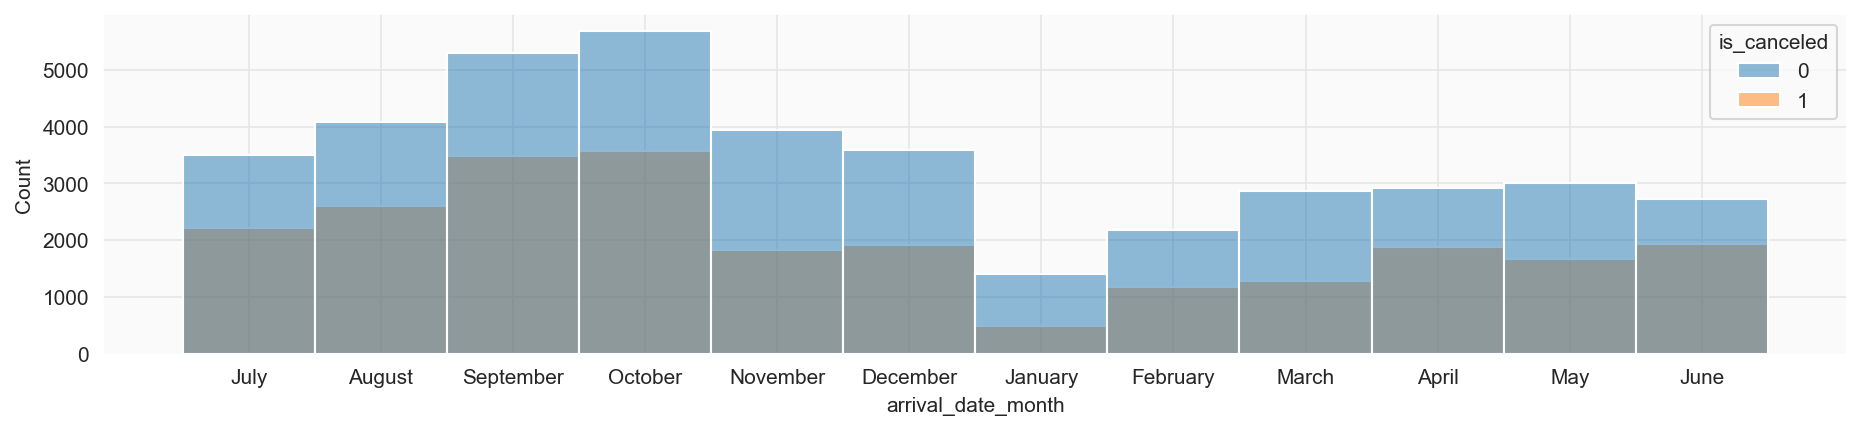

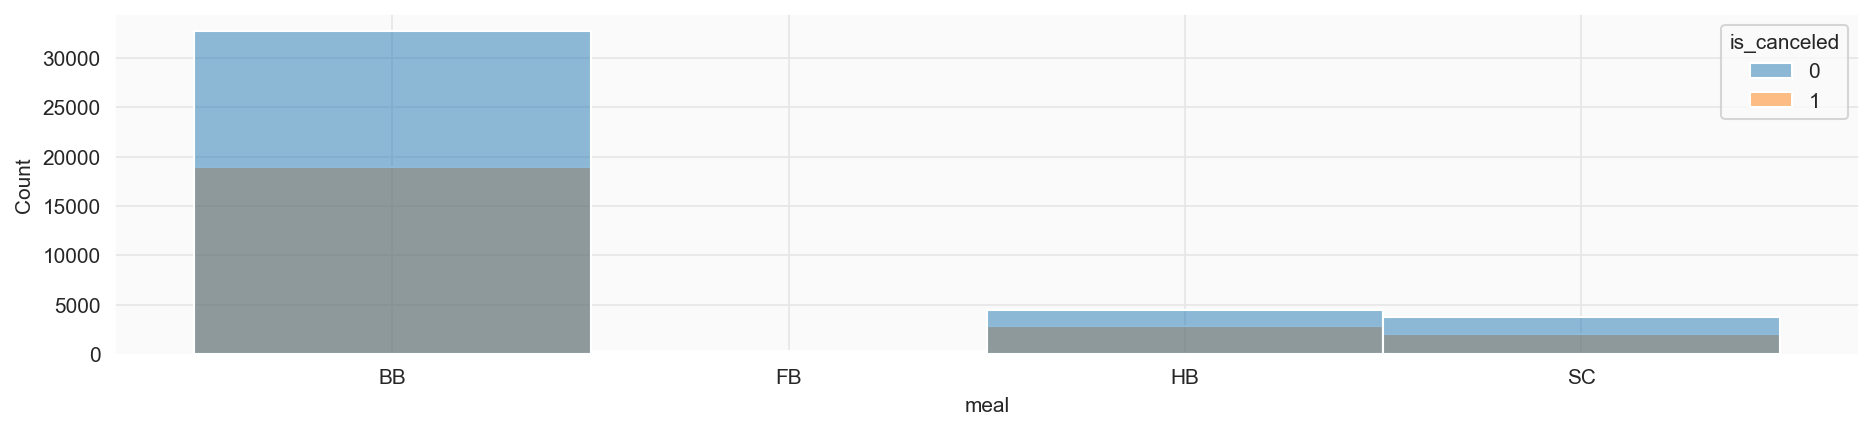

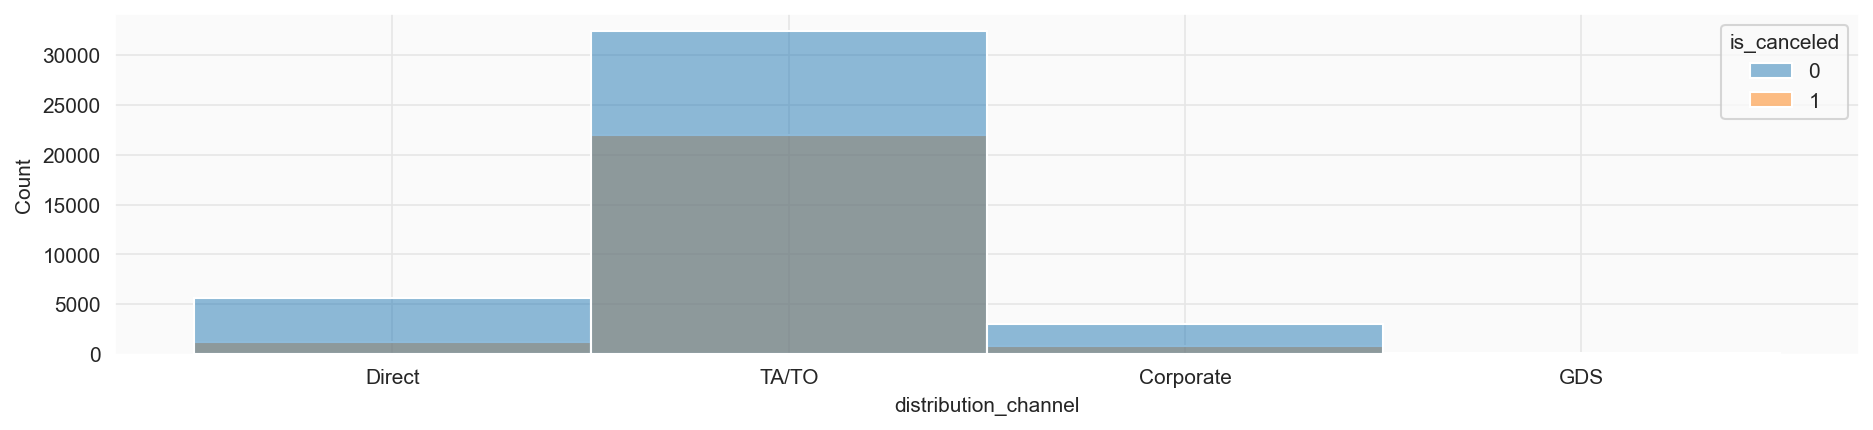

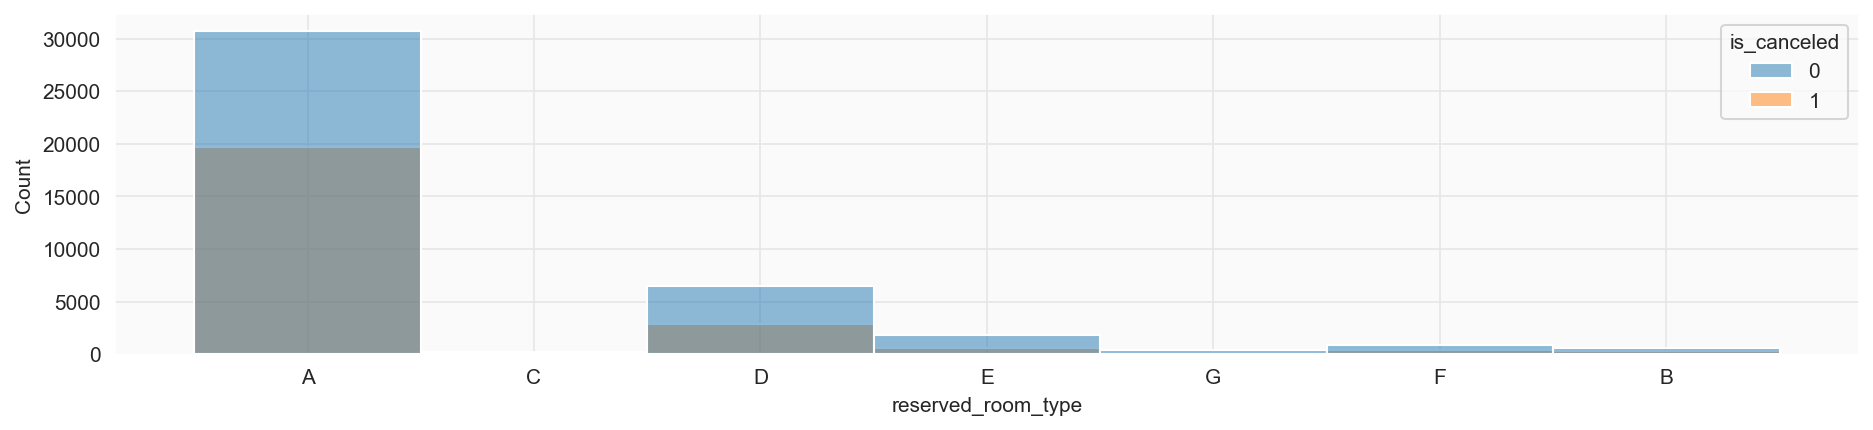

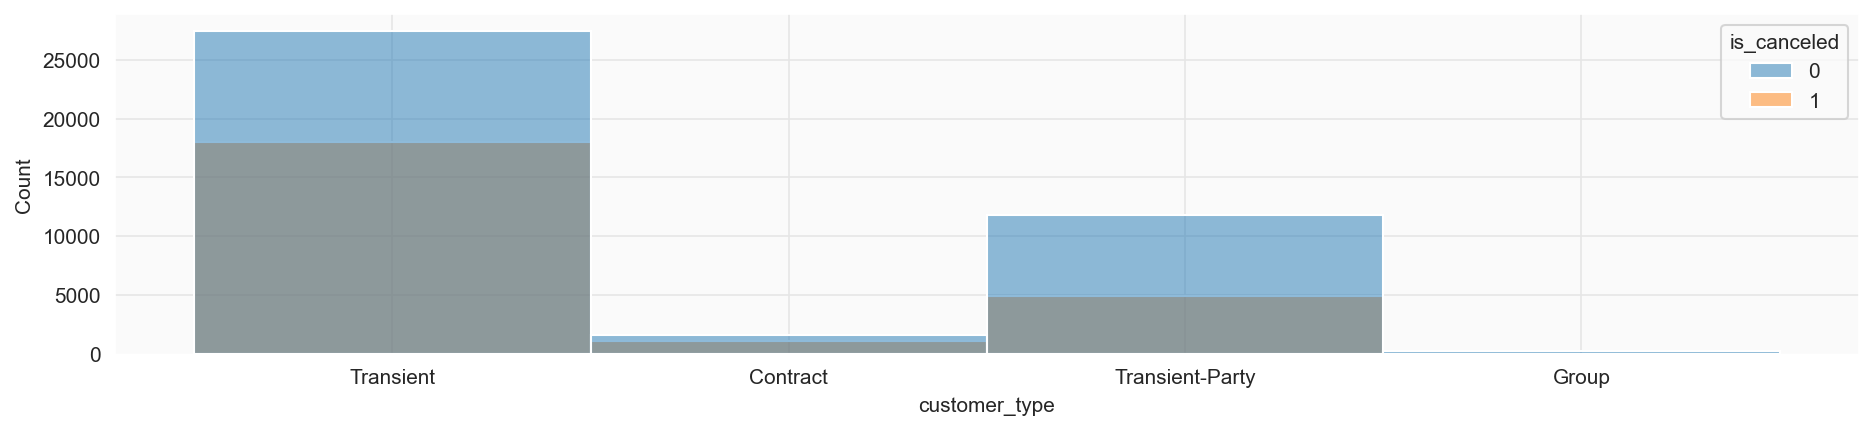

In [22]:
for column in df.drop('is_canceled', axis=1).columns:
    fig, ax = plt.subplots(figsize=(15,3), dpi=plot_dpi)
    sns.histplot(x=df[column], hue=df.is_canceled);

Дополнительные, по-своему показательные графики.  
Закомментировал, чтобы не загромождать проект.

In [23]:
# for column in df.drop('is_canceled', axis=1).columns:
#     fig, ax = plt.subplots(figsize=(15,3), dpi=plot_dpi)
#     sns.histplot(x=df[column], hue=df.is_canceled, multiple='fill');

#### Графики распределений числовых признаков

In [24]:
# временная таблица без лишних полей

num_fields = data.select_dtypes(include=[np.number]).columns.to_list()
df = data[num_fields]

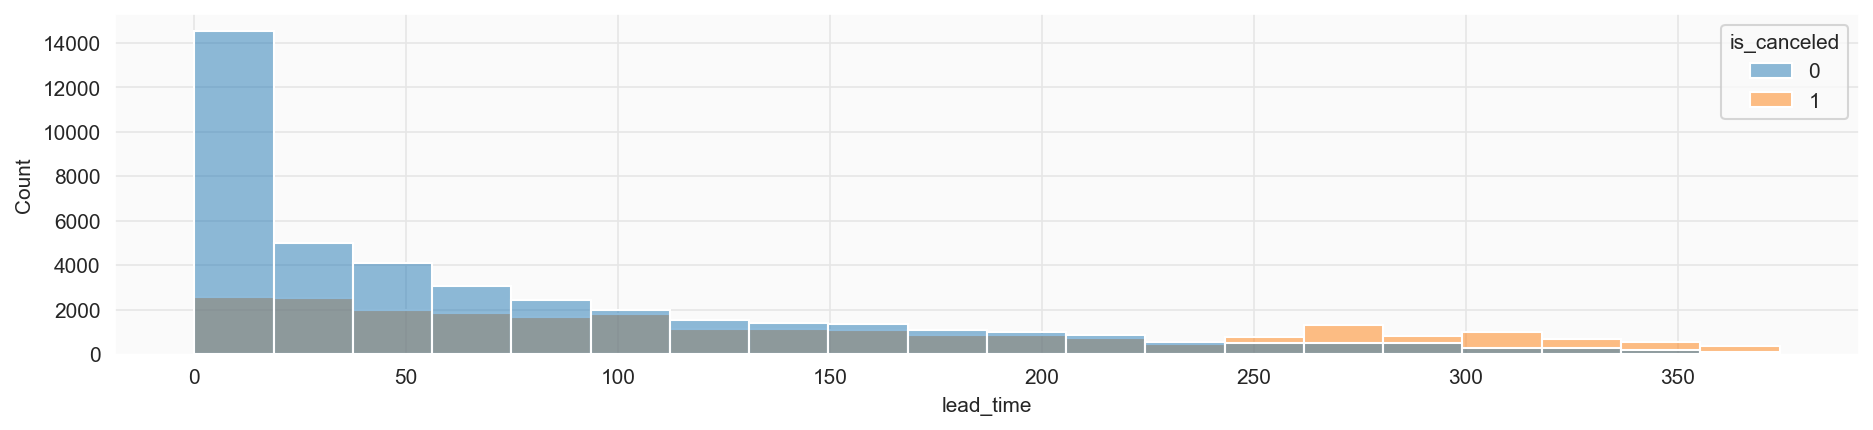

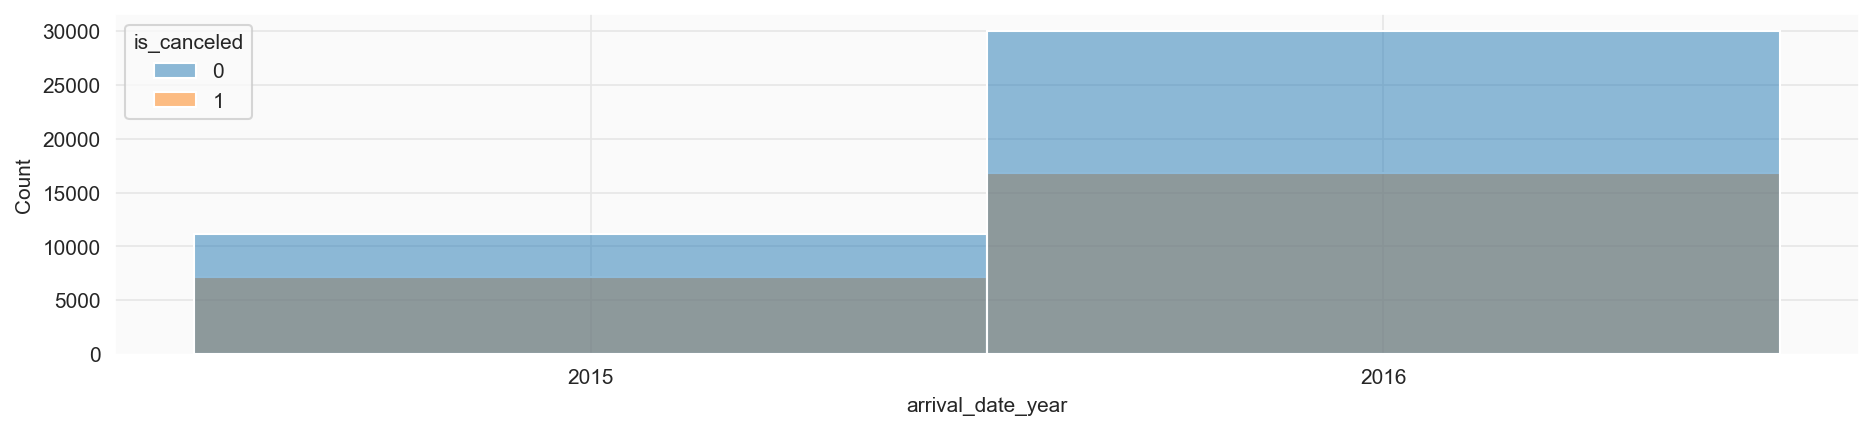

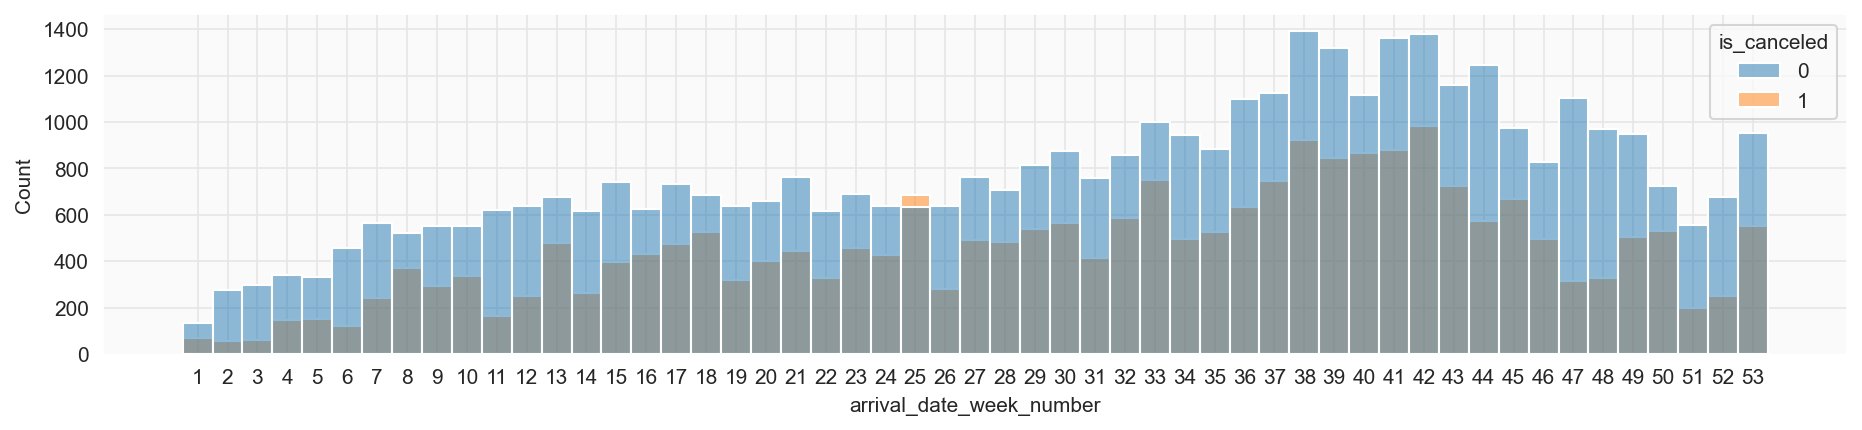

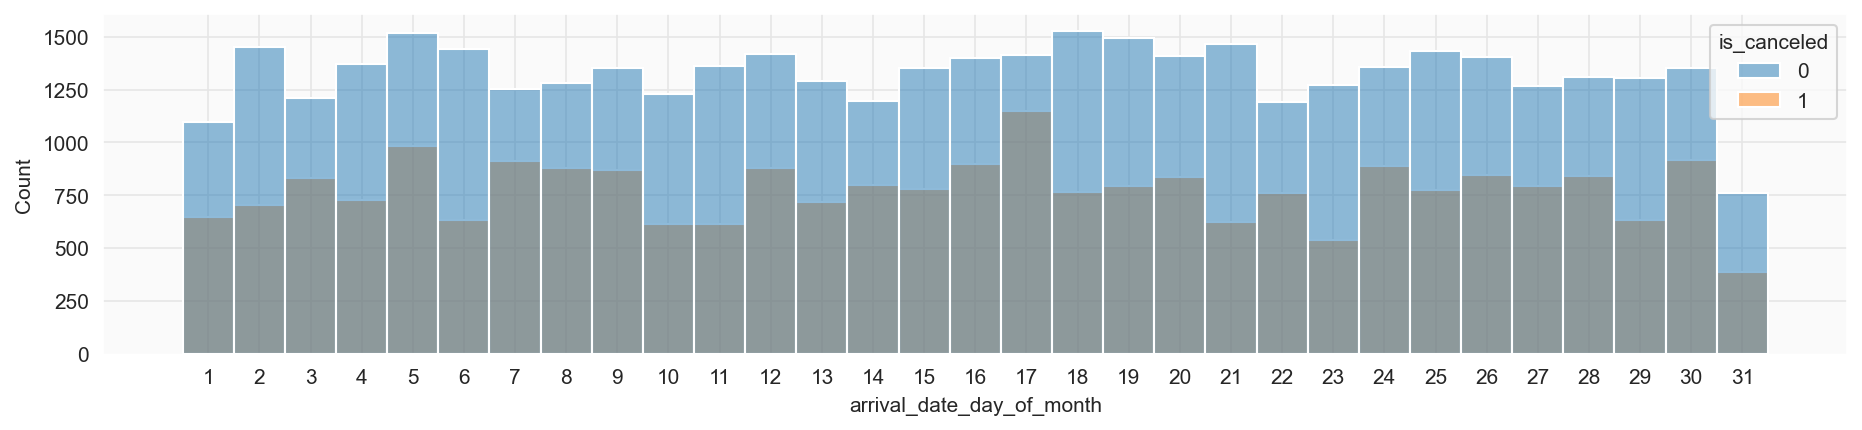

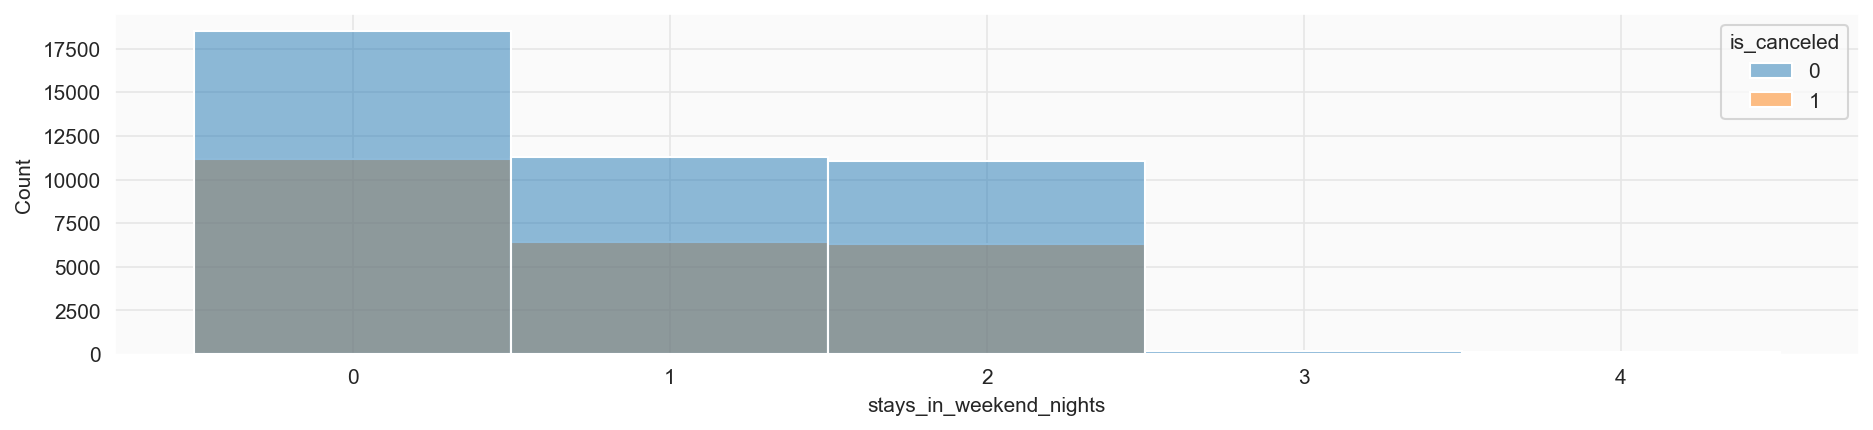

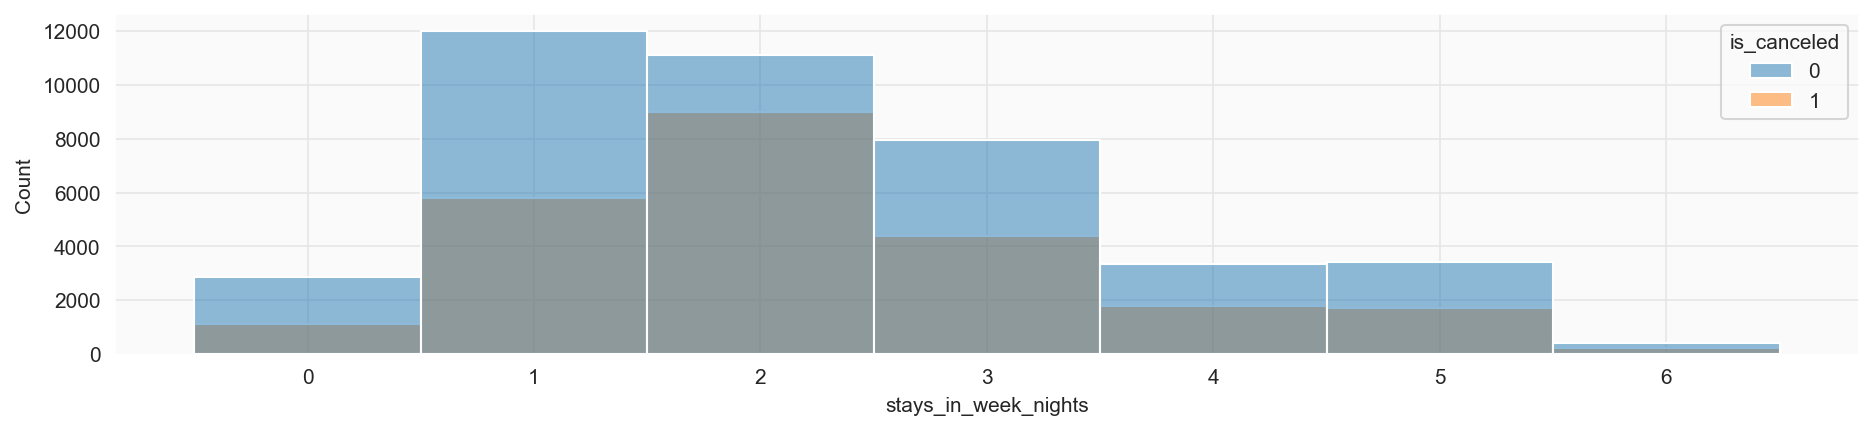

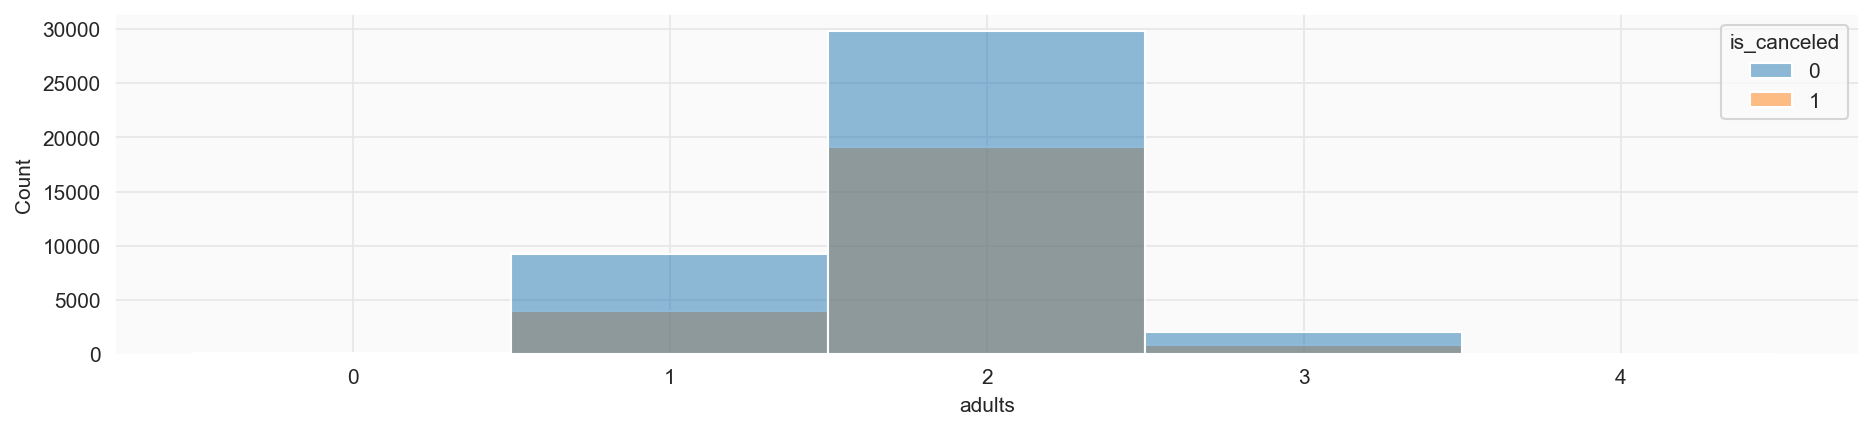

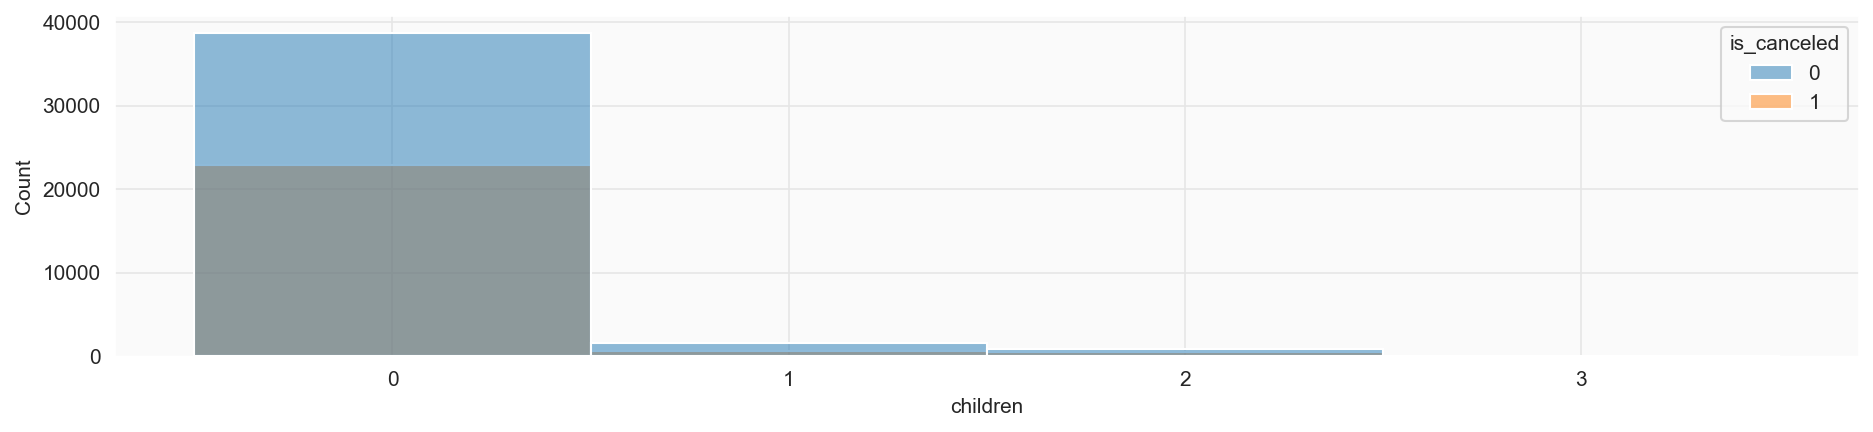

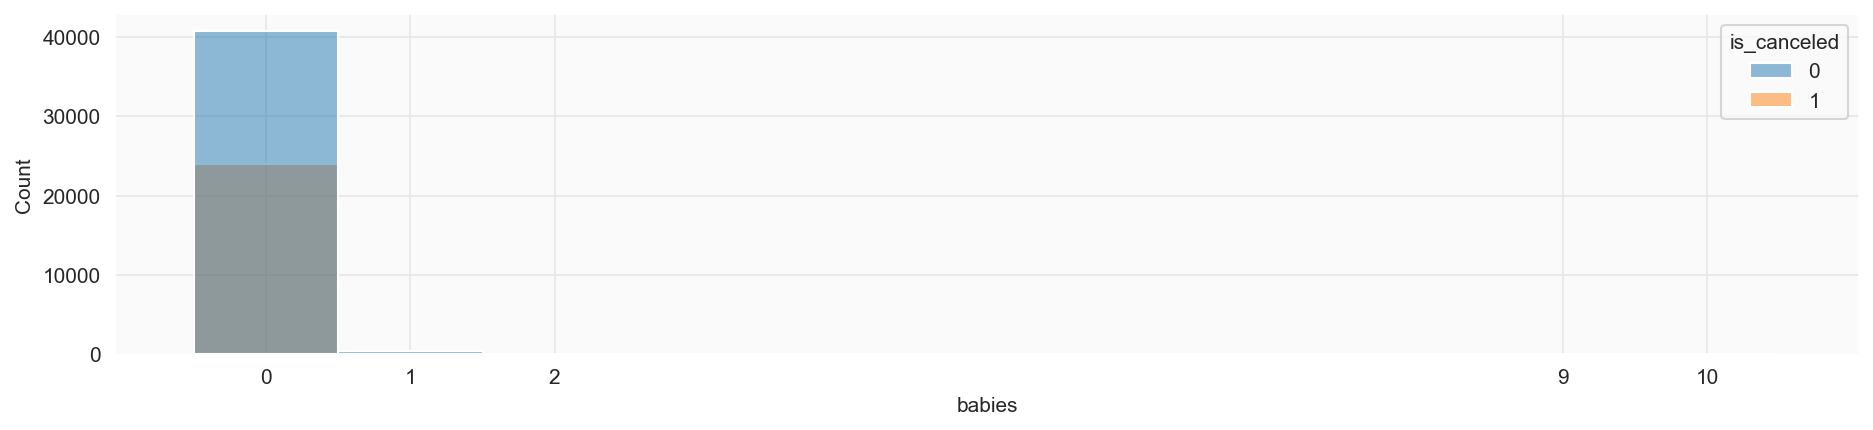

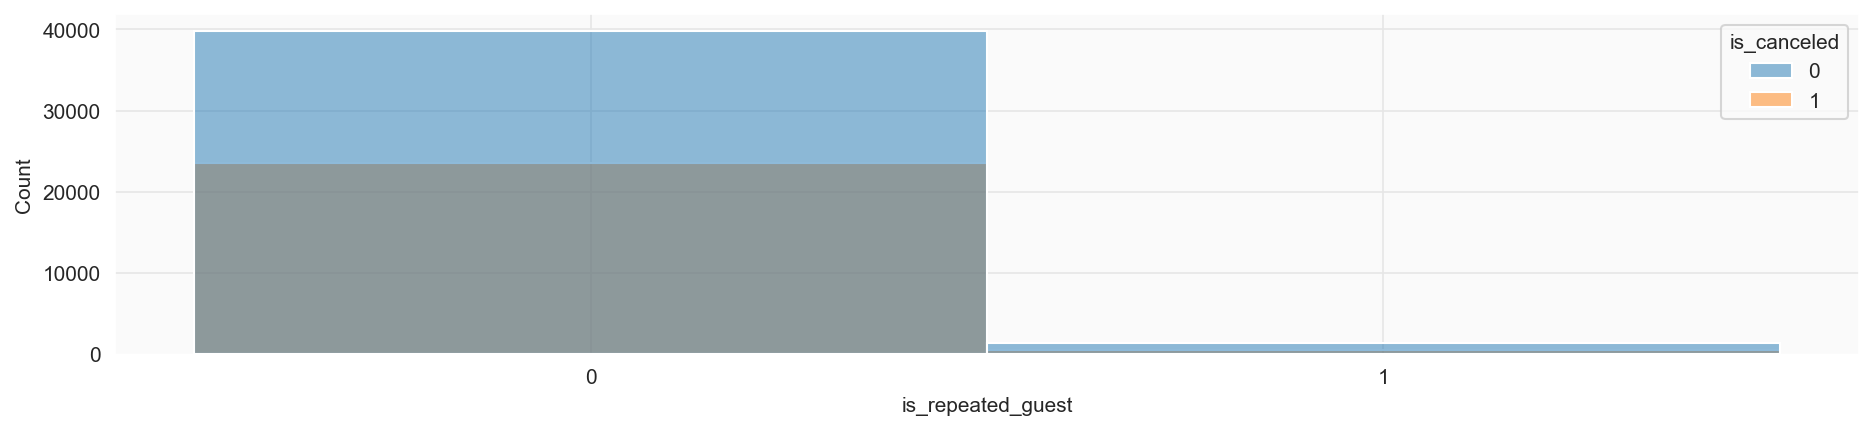

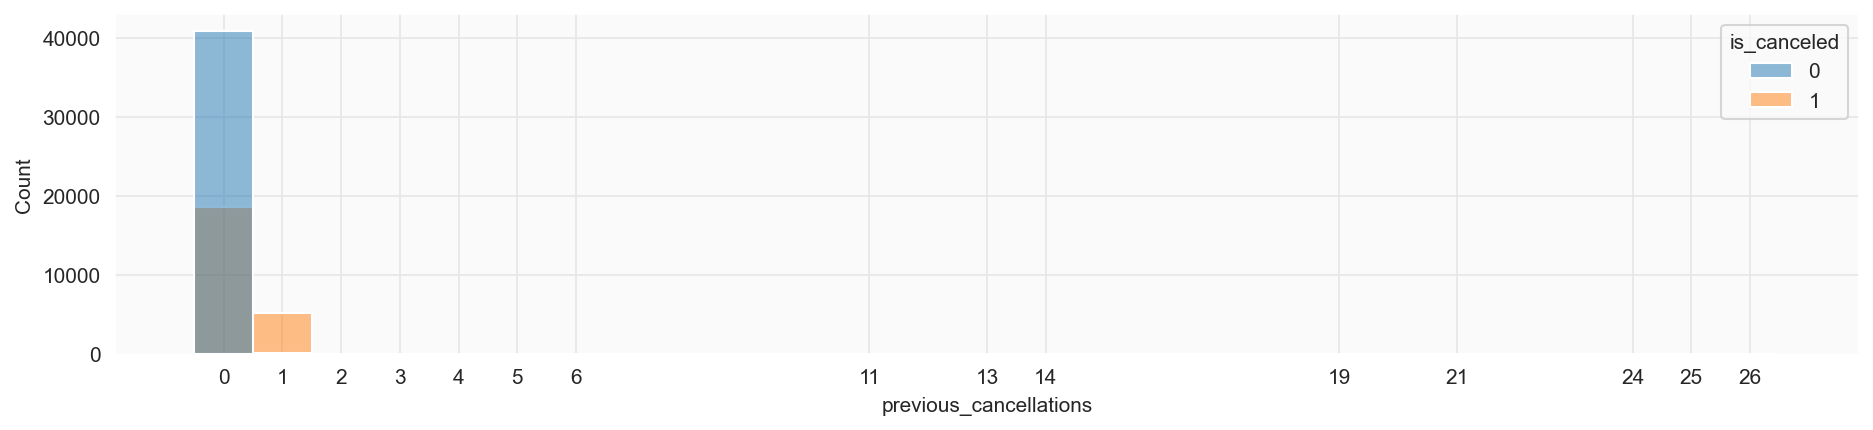

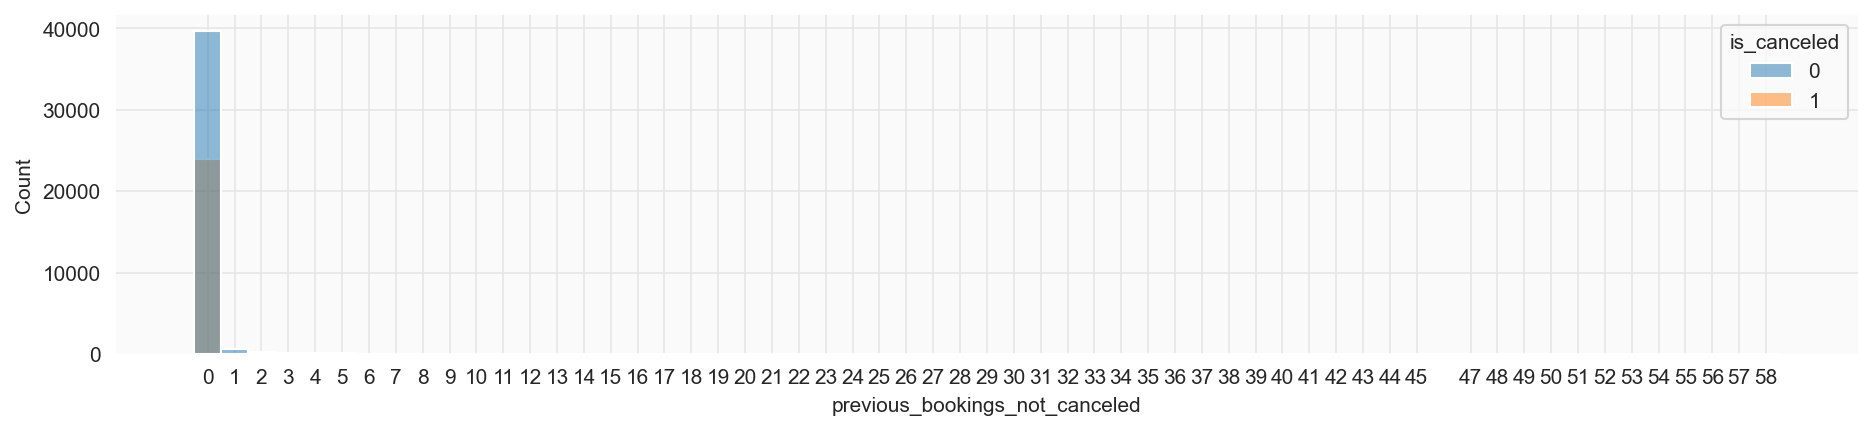

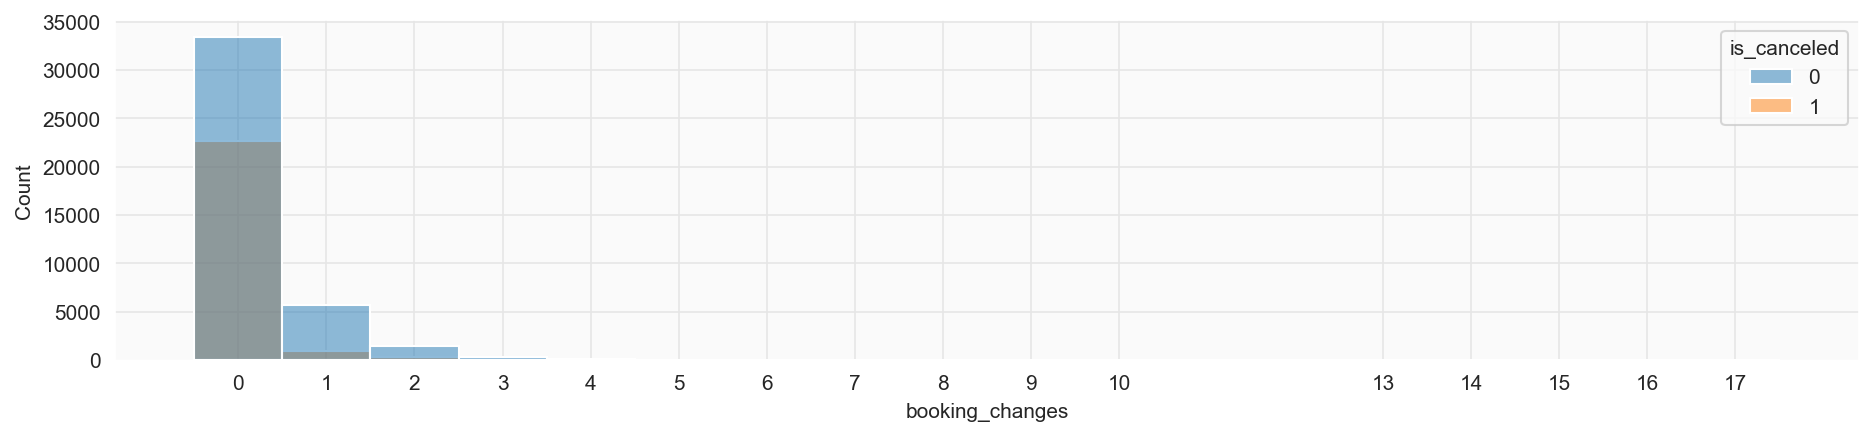

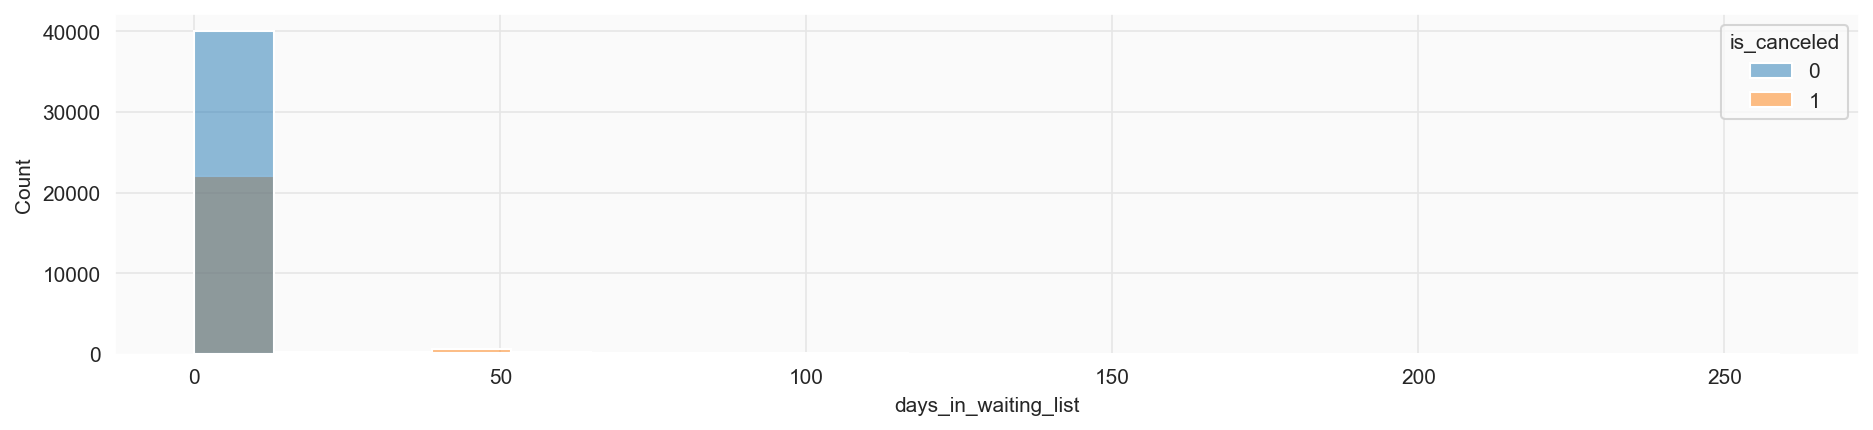

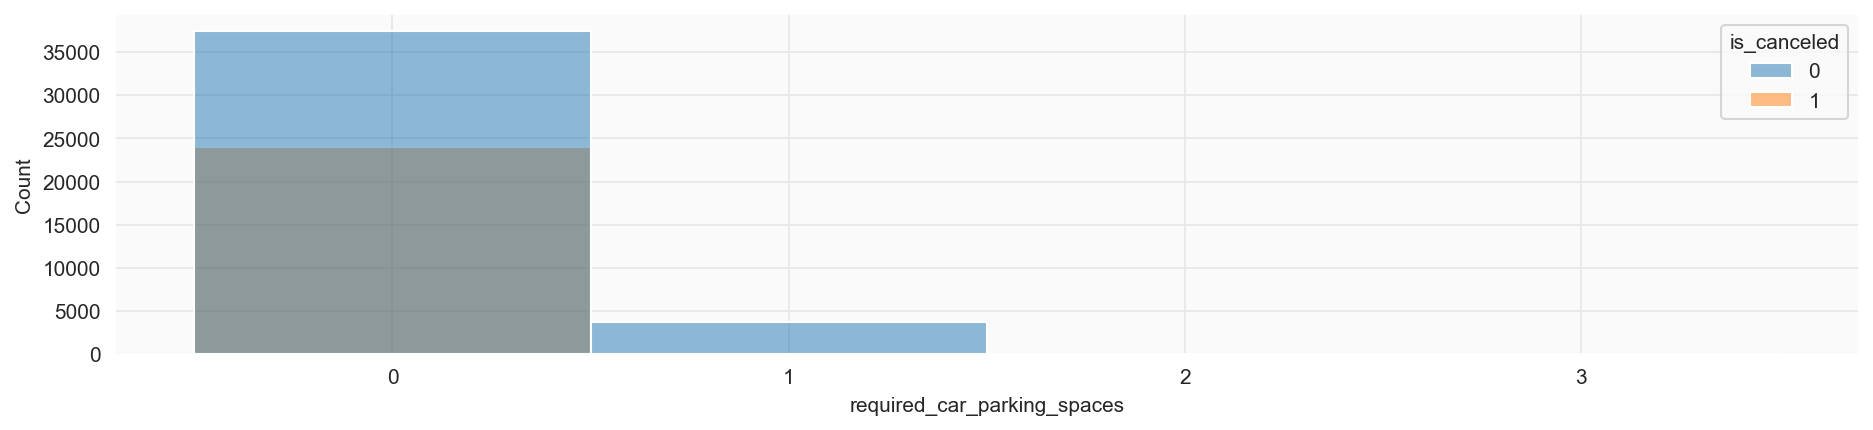

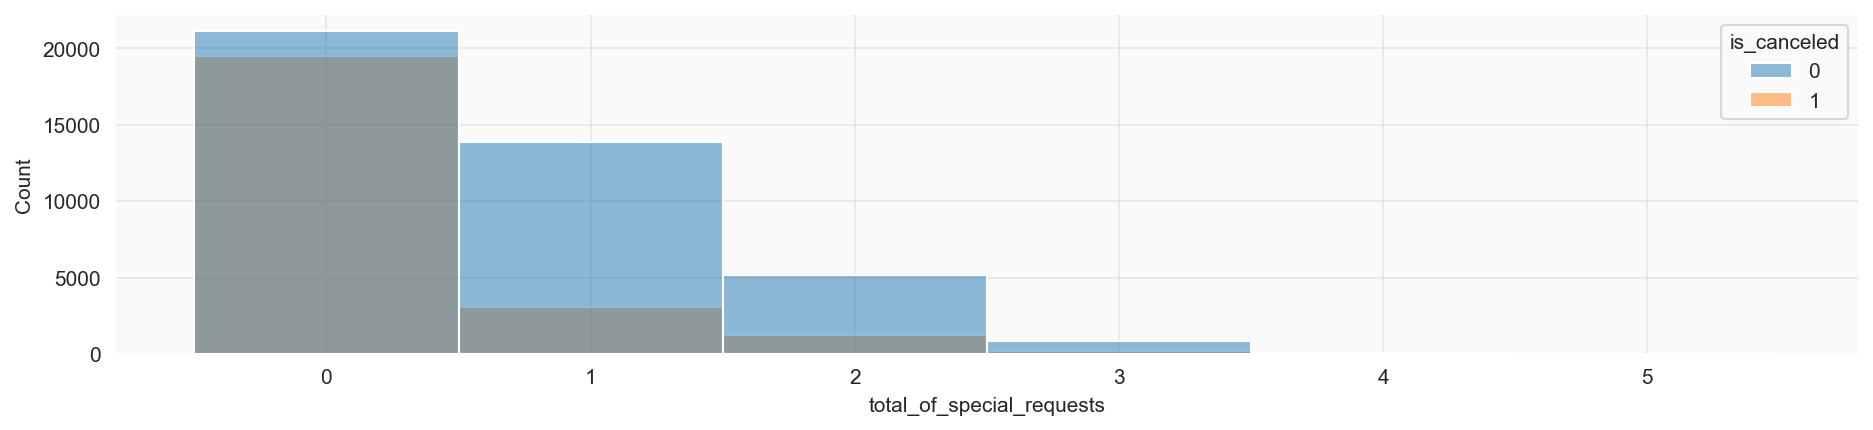

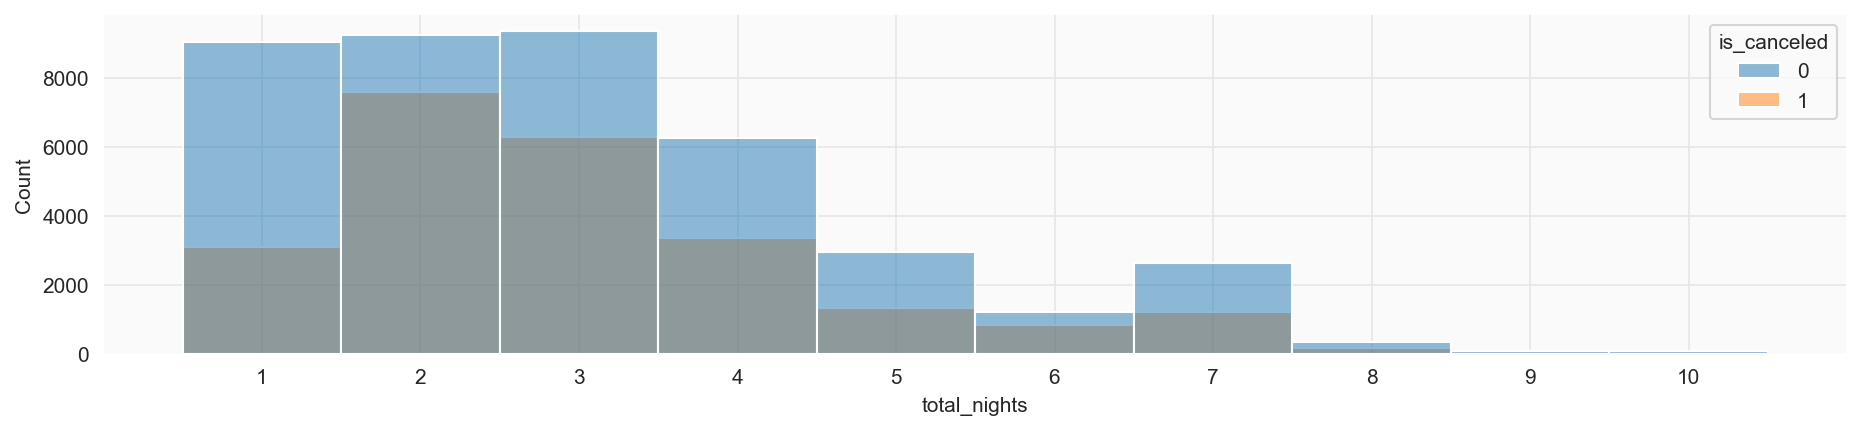

In [25]:
for column in df.drop('is_canceled', axis=1).columns:
    
    # подбор количества корзин для лучшего восприятия
    discrete_ = True if df[column].nunique() < 60 else False
    
    fig, ax = plt.subplots(figsize=(15,3), dpi=plot_dpi)
    sns.histplot(x=df[column], hue=df.is_canceled, bins=20, discrete=discrete_)
    
    if df[column].nunique() < 60:
        ax.set_xticks(df[column].unique());

Дополнительные, по-своему показательные графики.  
Закомментировал, чтобы не загромождать проект.

In [26]:
# for column in df.drop('is_canceled', axis=1).columns:
    
#     # подбор количества корзин для лучшего восприятия
#     discrete_ = True if df[column].nunique() < 60 else False
    
#     fig, ax = plt.subplots(figsize=(15,3), dpi=plot_dpi)
#     sns.histplot(x=df[column], hue=df.is_canceled, bins=20, discrete=discrete_, multiple='fill')
    
#     if df[column].nunique() < 60:
#         ax.set_xticks(df[column].unique());

> Можно предположить, что на отмену бронирования больше других могут влиять следующие признаки:  
> - `distribution_channel`;  
> - `lead_time`;  
> - `previous_cancellations` (в данных очень мало повторных клиентов, поэтому данное поле может оказаться бесполезным);  
> - `booking_changes`;  
> - `required_car_parking_spaces`;  
> - `total_of_special_requests`.

> Признаки, которые, вероятно, не помогут в обучении модели:
> - `arrival_date_month`;
> - `meal`;
> - `reserved_room_type`;
> - `customer_type`;
> - `arrival_date_year`;
> - `arrival_date_week_number`;
> - `arrival_date_day_of_month`;
> - `stays_in_weekend_nights`;
> - `stays_in_week_nights`;
> - `days_in_waiting_list`;
> - `adults`;
> - `total_nights`.

> Ряд признаков с сильным дисбалансом значений требует дополнительного изучения.

> Некоторые поля (например, месяц) не имеют выраженного влияния на целевой признак, но потребуются для других расчетов.

> По графикам некоторых признаков можно определить наличие выбросов. Все эти признаки далее будут либо исключены, либо преобразованы в бинарные, поэтому отдельно обрабатывать выбросы нет необходимости.

### Исследование признаков — кандидатов на преобразование в бинарные или удаление

Некоторые признаки имеют сильный дисбаланс значений, из-за чего их влияние на модель может быть малозначимым.  
Некоторые признаки, возможно, будут более информативными, если их преобразовать в бинарные.

In [303]:
def check_imbalanced_features(df: pd.DataFrame, field: str):
    '''
    Создает из переданного признака (field) бинарный по принципу равенства либо неравенства нулю.
    На базе созданного бинарного признака считает распределение "отказников" в переданном датафрейме.
    Если переданный признак изначально бинарный, функция все так же работает корректно.
    Функция ничего не возвращает, результат – вывод на экран.
    '''
    
    df['is_' + field] = df[field].apply(lambda x: 0 if x == 0 else 1)
    display(df.groupby([('is_' + field),'is_canceled']).size().unstack().fillna(0).assign(relative = lambda x: x[0]/x[1]))

In [304]:
# список исследуемых признаков с сильным дисбалансом
fields_lst = ['babies','children','is_repeated_guest','previous_bookings_not_canceled','days_in_waiting_list',
              'previous_cancellations', 'booking_changes', 'required_car_parking_spaces', 'total_of_special_requests']

for field in fields_lst:
    check_imbalanced_features(data.copy(), field)

is_canceled,0,1,relative
is_babies,,,
0,40815,23962,1.703
1,370,82,4.512


is_canceled,0,1,relative
is_children,,,
0,38782,22930,1.691
1,2403,1114,2.157


is_canceled,0,1,relative
is_is_repeated_guest,,,
0,39861,23597,1.689
1,1324,447,2.962


is_canceled,0,1,relative
is_previous_bookings_not_canceled,,,
0,39740,23946,1.660
1,1445,98,14.745


is_canceled,0,1,relative
is_days_in_waiting_list,,,
0,40080,21925,1.828
1,1105,2119,0.521


is_canceled,0,1,relative
is_previous_cancellations,,,
0,40943,18648,2.196
1,242,5396,0.045


is_canceled,0,1,relative
is_booking_changes,,,
0,33479,22716,1.474
1,7706,1328,5.803


is_canceled,0,1,relative
is_required_car_parking_spaces,,,
0,37503.000,24044.000,1.560
1,3682.000,0.000,inf


is_canceled,0,1,relative
is_total_of_special_requests,,,
0,21170,19501,1.086
1,20015,4543,4.406


> Почти для всех рассматриваемых в этом пункте признаков характерен существенный дисбаланс значений.

> Клиенты с младенцами гораздо реже отказываются от бронирования, но их количество крайне мало.  
> Можно удалить признак `babies`.
>
> Среди клиентов с детьми и без детей нет явно выраженной тенденции к отказу от бронирования.  
> Можно удалить признак `children`.
>
> Среди повторных клиентов есть тенденция к сохранению бронирования, но их количество крайне мало.  
> Можно удалить признак `is_repeated_guest`.
>
> Доля "отказников" среди клиентов, имеющих неотмененные заказы, значительно ниже, чем в среднем по датасету.  
> Создадим новый признак `is_previous_bookings_not_canceled`.
>
> Среди клиентов, которым пришлось ожидать подтверждения заказа, явно преобладают "отказники", но их количество крайне мало.  
> Можно удалить признак `is_days_in_waiting_list`.
>
> Клиенты, имеющие отказы от бронирования, многократно реже выполняют заказы.  
> Необходимо сохранить признак `is_previous_cancellations`.
>
> Клиенты, вносившие хотя бы одно изменение в заказ, гораздо реже отказываются от бронирования.  
> Создадим новый признак `is_booking_changes`.
>
> Клиенты, заказавшие хотя бы одно парковочное место, никогда не отказываются от бронирования.  
> Создадим новый признак `is_required_car_parking_spaces`.
>
> Клиенты, имеющие хотя бы одно дополнительное требование, гораздо реже отказываются от бронирования.  
> Создадим новый признак `is_total_of_special_requests`.

### Исследование признака `country`

Количество категорий в признаке `country` очень велико. При этом клиенты из ряда стран встречаются редко. Для более продуктивного анализа объединим клиентов из редких стран в одну категорию `OTHER`. Отнесем к ней те страны, из которых было менее 50 клиентов. Такой порог позволит вчетверо сократить число категорий, а сама категория `OTHER` не будет излишне многочисленной.  
Можно поэкспериментировать с порогом для оценки влияния на модель.

In [305]:
# всего разных стран
data.country.value_counts().count()

155

In [306]:
# количество клиентов из одной страны в среднем
print(f'{data.country.value_counts().sum() / data.country.value_counts().count():.0f}')

421


In [307]:
# новый признак с укрупненными категориями (в обучающей и тестовой выборках)

small_qnty_country = data.country.value_counts()[data.country.value_counts() < 50].index.to_list()

data['country_50'] = data.country
data['country_50'] = data.country.mask(data.country.isin(small_qnty_country), 'OTHER')

data_test['country_50'] = data_test.country
data_test['country_50'] = data_test.country.mask(data_test.country.isin(small_qnty_country), 'OTHER')

In [308]:
# всего разных стран после укрупнения категорий
data.country_50.value_counts().count()

40

In [309]:
# распределение "отказников" в признаке country
(
  data
 .groupby(['country_50','is_canceled'])
 .size()
 .unstack()
 .assign(total = lambda x: x[0] + x[1]).astype(int)
 .assign(canceled = lambda x: x[1]/x.total)
 .sort_values('total', ascending=False)
 .head(15)
)

is_canceled,0,1,total,canceled
country_50,,,,
PRT,12227,16604,28831,0.576
FRA,5098,876,5974,0.147
GBR,4171,938,5109,0.184
ESP,3819,1081,4900,0.221
DEU,3346,541,3887,0.139
ITA,1560,767,2327,0.330
IRL,1132,313,1445,0.217
OTHER,879,389,1268,0.307
BEL,1037,208,1245,0.167


> В топ-странах по количеству клиентов доля "отказников" ощутимо ниже средней – 37%.  
> Кроме одной: клиенты из страны `PRT` (Португалия?) намного чаще делают заказы, но и доля отмененных заказов намного выше.

> Признак `country_50` с учетом укрупнения категорий может оказаться значимым для модели.

---

## Создание новых признаков

В обучающей и тестовой выборках.

### Бинарные признаки

In [310]:
def add_binary_feature(df: pd.DataFrame, field: str):
    '''
    Создает из переданного признака (field) бинарный по принципу равенства либо неравенства нулю.
    На базе созданного бинарного признака считает распределение "отказников" в переданном датафрейме.
    Если переданный признак изначально бинарный, функция все так же работает корректно.
    '''
    
    df['is_' + field] = df[field].apply(lambda x: 0 if x == 0 else 1)
    
    return df

In [311]:
# список признаков, на основе которых необходимо создать бинарные признаки
feature_lst = ['previous_bookings_not_canceled',  # наличие неотмененных заказов
               'booking_changes',                 # вносил ли клиент изменения в заказ
               'required_car_parking_spaces',     # нужно ли клиенту парковочное место для автомобиля
               'total_of_special_requests',       # указал ли клиент дополнительные требования в заказе
              ]

for feature in feature_lst:
    data = add_binary_feature(data, feature)
    data_test = add_binary_feature(data_test, feature)

### Логарифмирование

In [312]:
data['lead_time_log'] = np.log(data.lead_time + 1).fillna(0)
data_test['lead_time_log'] = np.log(data_test.lead_time + 1).fillna(0)

### Нормализация

In [313]:
from scipy import stats

data['lead_time_boxcox'] = pd.Series(stats.boxcox(data.lead_time + 1)[0])
data_test['lead_time_boxcox'] = pd.Series(stats.boxcox(data_test.lead_time + 1)[0])

### Базовая стоимость аренды комнаты

Без учета сезонности.

In [314]:
data['base_room_price'] = np.select(
                                    [data.reserved_room_type == "A",
                                     data.reserved_room_type == "B",
                                     data.reserved_room_type == "C",
                                     data.reserved_room_type == "D",
                                     data.reserved_room_type == "E",
                                     data.reserved_room_type == "F",
                                     data.reserved_room_type == "G"],
                                    [1000, 800, 600, 550, 500, 450, 350]
                                   )

data_test['base_room_price'] = np.select(
                                    [data_test.reserved_room_type == "A",
                                     data_test.reserved_room_type == "B",
                                     data_test.reserved_room_type == "C",
                                     data_test.reserved_room_type == "D",
                                     data_test.reserved_room_type == "E",
                                     data_test.reserved_room_type == "F",
                                     data_test.reserved_room_type == "G"],
                                    [1000, 800, 600, 550, 500, 450, 350]
                                   )

### Сезонная стоимость аренды комнаты

Стоимость с учетом повышающего сезонного коэффициента.

In [315]:
SPRING_AUTUMN = ['March','April','May','September','October','November']
SUMMER = ['June','July','August']
WINTER = ['December','January','February']

SPRING_AUTUMN_COEFF = 1.2
SUMMER_COEFF = 1.4

data['season_room_price'] = np.select(
                                      [data.arrival_date_month.isin(WINTER),
                                       data.arrival_date_month.isin(SPRING_AUTUMN),
                                       data.arrival_date_month.isin(SUMMER)],
                                      [data.base_room_price * 1.0,
                                       data.base_room_price * 1.2,
                                       data.base_room_price * 1.4]
                                     ).astype(int)

data_test['season_room_price'] = np.select(
                                      [data_test.arrival_date_month.isin(WINTER),
                                       data_test.arrival_date_month.isin(SPRING_AUTUMN),
                                       data_test.arrival_date_month.isin(SUMMER)],
                                      [data_test.base_room_price,
                                       data_test.base_room_price * SPRING_AUTUMN_COEFF,
                                       data_test.base_room_price * SUMMER_COEFF]
                                     ).astype(int)

### Стоимость подготовки / уборки комнаты

In [316]:
data['room_service_price'] = np.select(
                                      [data.reserved_room_type == "A",
                                       data.reserved_room_type.isin(["B", "C"]),
                                       data.reserved_room_type.isin(["D", "E", "F", "G"])],
                                      [400, 350, 150]
                                     )

data_test['room_service_price'] = np.select(
                                      [data_test.reserved_room_type == "A",
                                       data_test.reserved_room_type.isin(["B", "C"]),
                                       data_test.reserved_room_type.isin(["D", "E", "F", "G"])],
                                      [400, 350, 150]
                                     )

---

## Прибыль до внедрения депозитов

Образец для демонстрации логики расчета количества уборок:

| кол-во ночей | подготовительная уборка | кол-во плановых уборок | всего уборок |
|--------------|-------------------------|------------------------|--------------|
| 1            | 1                       | 0                      | 1            |
| 2            | 1                       | 0                      | 1            |
| 3            | 1                       | 1                      | 2            |
| 4            | 1                       | 1                      | 2            |
| 5            | 1                       | 2                      | 3            |
| 6            | 1                       | 2                      | 3            |

Код для проверки алгоритма расчета количества уборок.

In [317]:
# for i in range(1, 7):
#     print(f'{i}: {(i+1) // 2}')

Расчет потенциальной прибыли для каждого заказа (без учета, выполнен заказ или отменен).

In [318]:
data['potential_profit'] = data.season_room_price * data.total_nights - ((data.total_nights + 1) // 2) * data.room_service_price

data_test['potential_profit'] = data_test.season_room_price * data_test.total_nights - ((data_test.total_nights + 1) // 2) * data_test.room_service_price

Расчет фактической прибыли для каждого заказа (с учетом, выполнен заказ или отменен).

In [319]:
data['profit'] = np.select([data.is_canceled == 0, data.is_canceled == 1],
                           [data.potential_profit,
                            (data.season_room_price + data.room_service_price) * (-1)]
                          )

data_test['profit'] = np.select([data_test.is_canceled == 0, data_test.is_canceled == 1],
                                [data_test.potential_profit,
                                 (data_test.season_room_price + data_test.room_service_price) * (-1)]
                               )

Образец для проверки: можно проверить расчет прибыли, начиная с выбора типа комнаты.

In [320]:
data[['is_canceled','reserved_room_type','arrival_date_month','total_nights',
      'season_room_price','room_service_price','potential_profit','profit']].sample()

,is_canceled,reserved_room_type,arrival_date_month,total_nights,season_room_price,room_service_price,potential_profit,profit
13536,0,A,July,4,1400,400,4800,4800


Суммарная прибыль за период, соответствующий входным данным.

In [321]:
print(f'{CR}Суммарная прибыль для обучающего набора: {f.BOLD}{data.profit.sum() / 1e6}{f.END} млн.руб.')
print(f'{CR}Суммарная прибыль для тестового набора: {f.BOLD}{data_test.profit.sum() / 1e6}{f.END} млн.руб.{CR}')


Суммарная прибыль для обучающего набора: 72.02792 млн.руб.

Суммарная прибыль для тестового набора: 35.300731 млн.руб.



Определение продолжительности периода входных данных.

In [322]:
# для обучающего набора
pd.to_datetime(
               data.arrival_date_year.astype(str) + '/' + 
               data.arrival_date_month.astype(str) + '/' + 
               data.arrival_date_day_of_month.astype(str)
              ).agg(['min','max'])

min   2015-07-01
max   2016-12-31
dtype: datetime64[ns]

In [323]:
# для тестового набора
pd.to_datetime(
               data_test.arrival_date_year.astype(str) + '/' + 
               data_test.arrival_date_month.astype(str) + '/' + 
               data_test.arrival_date_day_of_month.astype(str)
              ).agg(['min','max'])

min   2017-01-01
max   2017-08-31
dtype: datetime64[ns]

Суммарная прибыль в пересчете на один год (исходя из простого усреднения по месяцам).

In [324]:
print(f'{CR}Предполагаемая годовая прибыль для обучающего набора: {f.BOLD}{data.profit.sum() / 1e6 / 18*12 :.3f}{f.END} млн.руб.')
print(f'{CR}Предполагаемая годовая прибыль для тестового набора: {f.BOLD}{data_test.profit.sum() / 1e6 / 8*12 :.3f}{f.END} млн.руб.{CR}')


Предполагаемая годовая прибыль для обучающего набора: 48.019 млн.руб.

Предполагаемая годовая прибыль для тестового набора: 52.951 млн.руб.



> Прибыль до внедрения депозита на тестовом наборе составила 35.3 млн.руб. за 8 месяцев или 52.95 млн.руб. в пересчете на полный год.

> В прогнозе на полный 2017 год использовано простое помесячное усреднение. Для более точного прогноза можно рассчитать прибыль в зависимости от месяца, опираясь на предыдущий полный год.

---

## Корреляция

Исследована здесь, а не на этапе EDA, чтобы оценить силу связи между потенциальной прибылью `potential_profit` и отменой заказа (спойлер: связь почти отсутствует).

Корреляция оценивается по модулю, поскольку направление в данном случае неважно.

### Корреляция признаков с целевой переменной

In [325]:
data.corr('spearman').is_canceled.to_frame().drop('is_canceled').abs().sort_values('is_canceled', ascending=False)

,is_canceled
profit,0.838
previous_cancellations,0.374
lead_time_boxcox,0.338
lead_time_log,0.338
lead_time,0.338
is_total_of_special_requests,0.296
total_of_special_requests,0.287
is_required_car_parking_spaces,0.187
required_car_parking_spaces,0.187
is_booking_changes,0.184


### Корреляция признаков между собой

Только значения больше 0.3

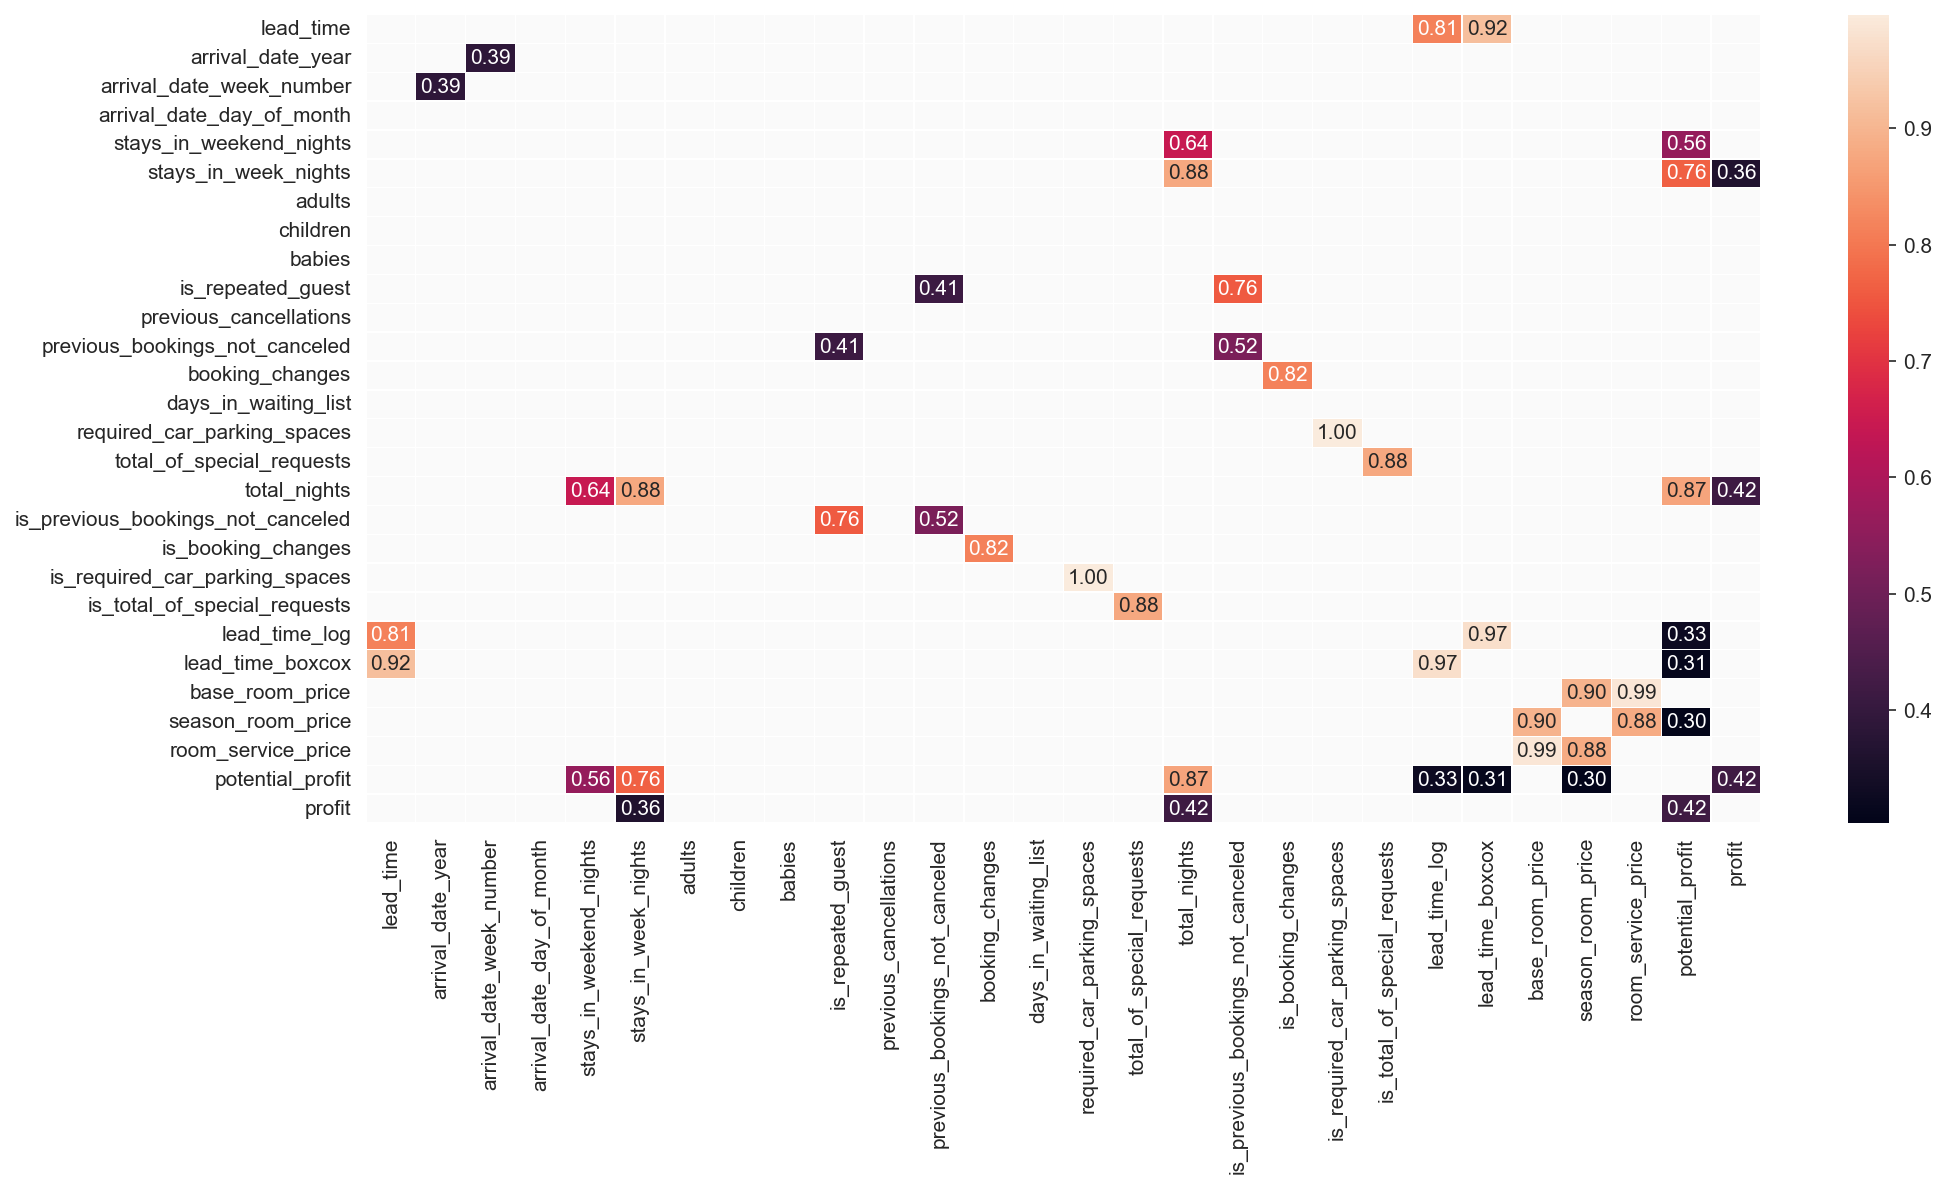

In [326]:
fig, ax = plt.subplots(figsize=(15,7), dpi=plot_dpi)
df = data.drop('is_canceled', axis=1).corr().abs()
sns.heatmap(df[(1 > df) & (df > 0.3)], annot=True, fmt='.2f', linewidths=0.2);

> Среди числовых признаков ни один не имеет выраженной кореляции с целевым признаком.  
> В целом, корреляция подтверждает предварительные выводы об исключении некоторых признаков и преобразовании ряда других в бинарные.

> Сильная корреляция между некоторыми признаками будет учтена на этапе выбора признаков и алгоритма для модели.

---

## Разработка модели ML

### Выбор метрики для оптимизации моделей

Для того, чтобы получить максимальную прибыль, отель предполагает брать депозит у потенциальных "отказников". Напрашивается решение – брать депозит со всех клиентов, тогда ни один отказник не ускользнет. Но, видимо, где-то в недрах маркетингового отдела есть информация, что такая политика отпугнет часть клиентов. И здесь наступает самое интересное: из условий задачи **неизвестно, как повлияет депозит на долю отказов.**

Будем исходить из того, что данный проект – только начало пути, и в будущем мы все-таки получим необходимую информацию. Метрика $F_β$ интересна не только тем, что гармонично объединяет метрики `precision` и `recall`, но и коэффициентом β. С его помощью можно регулировать соотношение важности `precision` и `recall`. Можно использовать это, если в будущем получим недостающую информацию от конспираторов-маркетологов.

![F1_score](https://habrastorage.org/getpro/habr/post_images/4f1/f5c/0ab/4f1f5c0ab5dcf8379ff4bcbbd02f0623.svg)

Пока остановимся на оптимизации моделей по метрике `F1`.

### Выделение признаков и целевой переменной

In [327]:
features = [
#             'lead_time',
            'lead_time_boxcox',
            'previous_cancellations',
            'is_total_of_special_requests',
            'is_required_car_parking_spaces',
            'is_booking_changes',
            'is_previous_bookings_not_canceled',
            'country_50',
            'distribution_channel',
            'customer_type']

X_train = data[features]
Y_train = data.is_canceled

X_test = data_test[features]
Y_test = data_test.is_canceled

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((65229, 9), (65229,), (32412, 9), (32412,))

### Предварительная оценка важности признаков: Mutual info

In [328]:
def mutual_info(X: pd.DataFrame, Y: pd.DataFrame):
    
    # Label encoding for categoricals
    for column in X.select_dtypes(exclude='number'):
        X[column], _ = X[column].factorize()

    # All discrete features should have integer dtypes
    discrete_features_lst = (X.dtypes == int)             # маска (булевый вектор) выделяющий дискретные признаки
    
#     m_info = mutual_info_classif(X, Y, n_neighbors=7, discrete_features=discrete_features_lst, random_state=RS)
    m_info = mutual_info_classif(X, Y, n_neighbors=7, random_state=RS)
    
    display(pd.Series(m_info, name="mutual info", index=X.columns).sort_values(ascending=False))

In [329]:
mutual_info(X_train.copy(), Y_train.copy())

lead_time_boxcox                    0.096
country_50                          0.079
previous_cancellations              0.077
is_total_of_special_requests        0.048
is_required_car_parking_spaces      0.027
is_booking_changes                  0.020
distribution_channel                0.016
is_previous_bookings_not_canceled   0.006
customer_type                       0.005
Name: mutual info, dtype: float64

In [330]:
# mutual_info(data.drop('is_canceled', axis=1), Y_train)

### Препроцессинг

Подготовка признаков: **масштабирование** для числовых признаков и **one-hot** кодирование для нечисловых.

Балансировка классов поручена встроенным методам моделей (у кого они есть). Применение сторонней балансировки (например, SVMSMOTE) катастрофически снижает скорость обучения.

In [331]:
# feature transform for tree-models

tree_FT = ('FT', ColumnTransformer([
                                      # для числовых признаков
                                      ('num', make_pipeline(StandardScaler()),
                                                            make_column_selector(dtype_include=['number'])
                                      ),
                                      # для категориальных признаков
                                      ('obj', make_pipeline(OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                           unknown_value=999)),
                                                            make_column_selector(dtype_exclude=['number'])
                                      )
                                     ])
           )

In [332]:
# feature transform for linear models

linear_FT = ('FT', ColumnTransformer([
                                      # для числовых признаков
                                      ('num', make_pipeline(StandardScaler()),
                                                            make_column_selector(dtype_include=['number'])
                                      ),
                                      # для категориальных признаков
                                      ('obj', make_pipeline(OneHotEncoder(sparse=False, handle_unknown='ignore')),
                                                            make_column_selector(dtype_exclude=['number'])
                                      )
                                     ])
           )

### Пайплайны моделей

In [333]:
pipelines_list = [Pipeline([ tree_FT, ('DC',  DummyClassifier(random_state=RS)) ]),
                  Pipeline([ tree_FT, ('RFC', RandomForestClassifier(random_state=RS)) ]),
                  Pipeline([ tree_FT, ('HGBC', HistGradientBoostingClassifier(random_state=RS)) ]),
                  Pipeline([ linear_FT, ('SGDC', SGDClassifier(random_state=RS)) ]),
                  Pipeline([ linear_FT, ('LSVC', LinearSVC(dual=False, random_state=RS)) ]),
                 ]

names_list = ['baseline: DummyClassifier', 'RandomForestClassifier',
              'HistGradientBoostingClassifier', 'SGDClassifier', 'LinearSVC']

short_names_list = ['DC', 'RFC', 'HGBC', 'SGDC', 'LSVC']

### Объединение всех данных о моделях в датафрейм

Для удобства контроля и обработки результата.

In [334]:
models = pd.DataFrame(data={'name': names_list,
                            'short_name': short_names_list,
                            'model': pipelines_list,
                           },
                     )
models

,name,short_name,model
0,baseline: DummyClassifier,DC,"(ColumnTransformer(transformers=[('num',\n Pipeline(steps=[('sta..."
1,RandomForestClassifier,RFC,"(ColumnTransformer(transformers=[('num',\n Pipeline(steps=[('sta..."
2,HistGradientBoostingClassifier,HGBC,"(ColumnTransformer(transformers=[('num',\n Pipeline(steps=[('sta..."
3,SGDClassifier,SGDC,"(ColumnTransformer(transformers=[('num',\n Pipeline(steps=[('sta..."
4,LinearSVC,LSVC,"(ColumnTransformer(transformers=[('num',\n Pipeline(steps=[('sta..."


### Objective function для Optuna

In [335]:
def objective_DC(trial):

    params = {'DC__strategy': trial.suggest_categorical('DC__strategy', ['most_frequent', 'prior','stratified','uniform'])}
    model.set_params(**params)
    cv_SKF = StratifiedKFold(n_splits=5)
    
    return cross_val_score(model, X_train, Y_train, scoring=SCORING, cv=cv_SKF, n_jobs=-1).mean()

In [336]:
def objective_RFC(trial):

    params = {
              'RFC__n_estimators': trial.suggest_int('RFC__n_estimators', 50, 1000, log=True),
              'RFC__max_depth': trial.suggest_int('RFC__max_depth', 1, 50),
              'RFC__class_weight': trial.suggest_categorical('RFC__class_weight', ['balanced', 'balanced_subsample', None]),
             }
    model.set_params(**params)
    cv_SKF = StratifiedKFold(n_splits=5)
    
    return cross_val_score(model, X_train, Y_train, scoring=SCORING, cv=cv_SKF, n_jobs=-1).mean()

In [337]:
def objective_HGBC(trial):

    params = {
              'HGBC__max_depth': trial.suggest_int('HGBC__max_depth', 10, 100),
              'HGBC__learning_rate': trial.suggest_float('HGBC__learning_rate', 0.1, 10.0, log=True),
              'HGBC__max_iter': trial.suggest_int('HGBC__max_iter', 10, 500, log=True),
              'HGBC__l2_regularization': trial.suggest_float('HGBC__l2_regularization', 0.001, 1000),
              'HGBC__max_bins': trial.suggest_int('HGBC__max_bins', 5, 255),
             }
    model.set_params(**params)
    cv_SKF = StratifiedKFold(n_splits=5)
    
    return cross_val_score(model, X_train, Y_train, scoring=SCORING, cv=cv_SKF, n_jobs=-1).mean()

In [338]:
def objective_SGDC(trial):

    params = {
              'SGDC__loss': trial.suggest_categorical('SGDC__loss', ['hinge','log_loss','modified_huber','squared_hinge','perceptron']),
              'SGDC__penalty': trial.suggest_categorical('SGDC__penalty', ['l1', 'l2', 'elasticnet']),
              'SGDC__max_iter': trial.suggest_int('SGDC__max_iter', 5, 1000, log=True),
              'SGDC__validation_fraction': trial.suggest_float('SGDC__validation_fraction', 0.001, 0.999999),
              'SGDC__class_weight': trial.suggest_categorical('SGDC__class_weight', ['balanced', None]),
             }
    model.set_params(**params)
    cv_SKF = StratifiedKFold(n_splits=5)
    
    return cross_val_score(model, X_train, Y_train, scoring=SCORING, cv=cv_SKF, n_jobs=-1).mean()

In [339]:
def objective_LSVC(trial):

    params = {
              'LSVC__penalty': trial.suggest_categorical('LSVC__penalty', ['l1', 'l2']),
              'LSVC__max_iter': trial.suggest_int('LSVC__max_iter', 10, 1000, log=True),
              'LSVC__C': trial.suggest_float('LSVC__C', 0.01, 100, log=True),
              'LSVC__class_weight': trial.suggest_categorical('LSVC__class_weight', ['balanced', None]),
             }
    model.set_params(**params)
    cv_SKF = StratifiedKFold(n_splits=5)
    
    return cross_val_score(model, X_train, Y_train, scoring=SCORING, cv=cv_SKF, n_jobs=-1).mean()

### Подбор гиперпараметров

In [340]:
for item in range(models.shape[0]):
    
    model = models.loc[item,'model']
    
    # создание объекта optuna.study
    study = optuna.create_study(
                                study_name=models.loc[item,'name'],
                                direction="maximize",
                                sampler=optuna.samplers.TPESampler(seed=RS)
                               )

    # оптимизация (подбор гиперпараметров)
    if models.loc[item,'short_name'] == 'DC':
        study.optimize(objective_DC, n_trials=N_TRIALS, timeout=TIMEOUT, show_progress_bar=True, n_jobs=-1)
    elif models.loc[item,'short_name'] == 'RFC':
        study.optimize(objective_RFC, n_trials=N_TRIALS//4, timeout=TIMEOUT, show_progress_bar=True, n_jobs=-1)
    elif models.loc[item,'short_name'] == 'HGBC':
        study.optimize(objective_HGBC, n_trials=N_TRIALS, timeout=TIMEOUT, show_progress_bar=True, n_jobs=-1)
    elif models.loc[item,'short_name'] == 'SGDC':
        study.optimize(objective_SGDC, n_trials=N_TRIALS, timeout=TIMEOUT, show_progress_bar=True, n_jobs=-1)
    elif models.loc[item,'short_name'] == 'LSVC':
        study.optimize(objective_LSVC, n_trials=N_TRIALS, timeout=TIMEOUT, show_progress_bar=True, n_jobs=-1)

    # извлечение и обучение лучшей модели
    model.set_params(**study.best_params).fit(X_train, Y_train)

    # сохранение результатов в таблице моделей
    models.loc[item,'model'] = model
    models.loc[item,'study'] = study
    
    print(f'{CR}{f.BOLD}{study.study_name}{f.END}{CR}')
    print(f'Количество попыток: {len(study.trials)}')
    print(f'Лучший результат: {f.BOLD}{study.best_value:0.4f}{f.END}{CR}')
    print('Комбинация гиперпараметров:')
    print(json.dumps(study.best_params, indent=1, sort_keys=True), f'{CR}')

  0%|          | 0/200 [00:00<?, ?it/s]


baseline: DummyClassifier

Количество попыток: 200
Лучший результат: 0.4236

Комбинация гиперпараметров:
{
 "DC__strategy": "prior"
} 



  0%|          | 0/50 [00:00<?, ?it/s]


RandomForestClassifier

Количество попыток: 50
Лучший результат: 0.6981

Комбинация гиперпараметров:
{
 "RFC__class_weight": "balanced",
 "RFC__max_depth": 10,
 "RFC__n_estimators": 51
} 



  0%|          | 0/200 [00:00<?, ?it/s]


HistGradientBoostingClassifier

Количество попыток: 200
Лучший результат: 0.6878

Комбинация гиперпараметров:
{
 "HGBC__l2_regularization": 400.620533445183,
 "HGBC__learning_rate": 0.36790227964922284,
 "HGBC__max_bins": 54,
 "HGBC__max_depth": 63,
 "HGBC__max_iter": 57
} 



  0%|          | 0/200 [00:00<?, ?it/s]


SGDClassifier

Количество попыток: 200
Лучший результат: 0.7109

Комбинация гиперпараметров:
{
 "SGDC__class_weight": "balanced",
 "SGDC__loss": "modified_huber",
 "SGDC__max_iter": 633,
 "SGDC__penalty": "l1",
 "SGDC__validation_fraction": 0.8468980605238785
} 



  0%|          | 0/200 [00:00<?, ?it/s]


LinearSVC

Количество попыток: 166
Лучший результат: 0.7038

Комбинация гиперпараметров:
{
 "LSVC__C": 0.07182279605095095,
 "LSVC__class_weight": "balanced",
 "LSVC__max_iter": 541,
 "LSVC__penalty": "l1"
} 



### Визуализация результатов подбора гиперпараметров

Помогает cкорректировать процесс подбора.

In [341]:
# for item in range(models.shape[0]):
#     plot_Optuna(models.loc[item,'study'], 'plot_slice', models.loc[item, 'name'])
# #     plot_Optuna(models.loc[item,'study'], 'plot_param_importances', models.loc[item, 'name'])     # может работать долго !
# #     plot_Optuna(models.loc[item,'study'], 'plot_optimization_history', models.loc[item, 'name'])

### Лучшая модель

In [342]:
BEST_MODEL_NAME = 'SGDClassifier'

model = models.model.values[models.name == BEST_MODEL_NAME][0]

> По результатам валидации самое высокое значение метрики `F1` у модели `SGDClassifier`.

### Функция для сравнения дополнительных метрик

In [343]:
def add_model_metrics(models, X_train, Y_train, X_test, Y_test, cv=5, scoring_list=['f1']):
    '''
    Принимает датафрейм со списком моделей и их характеристиками.
    Добавляет в принятый датафрейм несколько метрик.
    
    :models: датафрейм с информацией об обученных моделях
    :X_train: обучающая выборка (признаки)
    :Y_train: обучающая выборка (целевая переменная)
    :X_test: тестовая выборка (признаки)
    :Y_test: тестовая выборка (целевая переменная)
    :scoring: метрики для оценки
    '''

    for scoring in scoring_list:
    
        # результаты моделей на обучающей выборке (усреднение на кроссвалидации)
        models[scoring + '_valid'] = models.model.apply(
                              lambda model: cross_val_score(model, X_train, Y_train, scoring=scoring, cv=cv, n_jobs=-1).mean())

        # результаты моделей на тестовой выборке (усреднение на кроссвалидации)
        models[scoring + '_test'] = models.model.apply(
                              lambda model: cross_val_score(model, X_test, Y_test, scoring=scoring, cv=cv, n_jobs=-1).mean())
    
    # ROC_AUC, коэффициент корреляции Мэтьюса, коэффициент каппа Коэна
    models['ROC_AUC'] = models.model.apply(lambda model: roc_auc_score(Y_test, model.predict(X_test)))
    models['matthews_coeff'] = models.model.apply(lambda model: matthews_corrcoef(Y_test, model.predict(X_test)))
    models['cohen_kappa'] = models.model.apply(lambda model: cohen_kappa_score(Y_test, model.predict(X_test)))
    
    # оптимальные гиперпараметры
    models['best_params'] = models.study.apply(lambda model: model.best_params)
    
    return models

### Сравнение моделей

Проверим выбранную модель, оценив дополнительные метрики.  
Заодно проверим остальные модели на большем количестве метрик.

In [344]:
models = add_model_metrics(models, X_train, Y_train, X_test, Y_test, cv=5, scoring_list=['f1','accuracy','recall'])

models.drop(['short_name','model','study','best_params'], axis=1)

,name,f1_valid,f1_test,accuracy_valid,accuracy_test,recall_valid,recall_test,ROC_AUC,matthews_coeff,cohen_kappa
0,baseline: DummyClassifier,0.000,0.000,0.631,0.612,0.000,0.000,0.500,0.000,0.000
1,RandomForestClassifier,0.698,0.672,0.777,0.730,0.715,0.711,0.742,0.489,0.489
2,HistGradientBoostingClassifier,0.688,0.657,0.798,0.757,0.634,0.608,0.733,0.497,0.487
3,SGDClassifier,0.711,0.679,0.780,0.738,0.742,0.720,0.748,0.488,0.487
4,LinearSVC,0.704,0.685,0.777,0.738,0.730,0.733,0.748,0.485,0.479


Копия результата (на всякий случай)

|   |                           name | f1_valid | f1_test | accuracy_valid | accuracy_test | recall_valid | recall_test | ROC_AUC | matthews_coeff | cohen_kappa |
|--:|-------------------------------:|---------:|--------:|---------------:|--------------:|-------------:|------------:|--------:|---------------:|------------:|
| 0 | baseline: DummyClassifier      | 0.000    | 0.000   | 0.631          | 0.612         | 0.000        | 0.000       | 0.500   | 0.000          | 0.000       |
| 1 | RandomForestClassifier         | 0.698    | 0.672   | 0.777          | 0.730         | 0.715        | 0.711       | 0.742   | 0.489          | 0.489       |
| 2 | HistGradientBoostingClassifier | 0.688    | 0.657   | 0.798          | 0.757         | 0.634        | 0.608       | 0.733   | 0.497          | 0.487       |
| 3 | SGDClassifier                  | 0.711    | 0.679   | 0.780          | 0.738         | 0.742        | 0.720       | 0.748   | 0.488          | 0.487       |
| 4 | LinearSVC                      | 0.704    | 0.685   | 0.777          | 0.738         | 0.730        | 0.733       | 0.748   | 0.485          | 0.479       |

> На тестовой выборке метрика `F1` всех моделей несколько снизилась. Дополнительные метрики достаточно высоки, чтобы подтвердить правильный выбор модели.

> В целом, все модели показали себя неплохо, и при некоторой доработке могли бы претендовать на выбор. Но в этом проекте выбор уже сделан ))

### Важность признаков

Для выбранной модели.

#### Функция для визуализации важности признаков

In [345]:
def plot_feature_importances(model_name, feature_names, feature_importances):
    """
    Выводит график важности признаков, использованных моделью.
    
    :model_name: название модели
    :feature_names: названия признаков
    :feature_importances: важность признаков
    """
    
    fig, ax = plt.subplots(figsize=(15,5), dpi=plot_dpi)

    df = pd.DataFrame({'features': feature_names,
                       'importances': feature_importances.importances_mean,
                       'std_err': feature_importances.importances_std,
                      }).sort_values('importances', ascending=False)
    
    sns.barplot(
                x=df.importances,
                y=df.features,
                xerr=df.std_err,
                color='skyblue',
               )
    
    ax.set_title(f'{model_name}: permutation importance', fontsize=18, pad=20)

#### Важность признаков для обучающей выборки

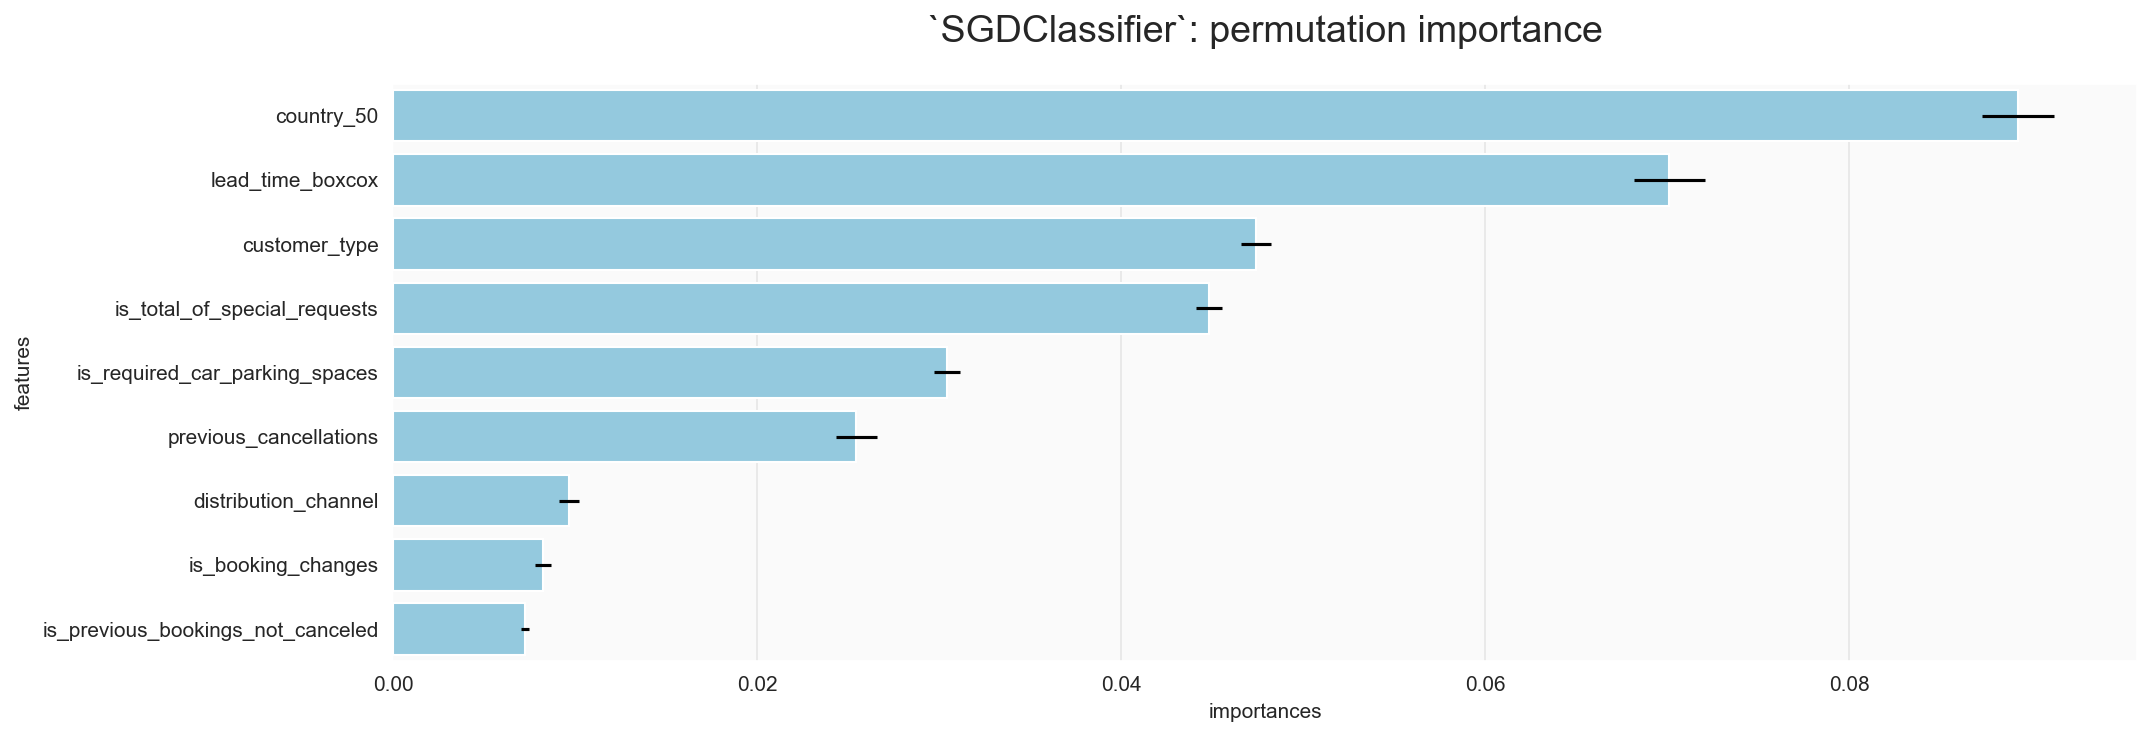

In [346]:
plot_feature_importances(
                         '`SGDClassifier`',
                         # извлечение списка признаков
                         model.feature_names_in_,
                         # вычисление важности признаков
                         permutation_importance(model, X_train, Y_train,
                                                scoring=SCORING, n_repeats=10, n_jobs=-1, random_state=RS)
                        )

#### Важность признаков для тестовой выборки

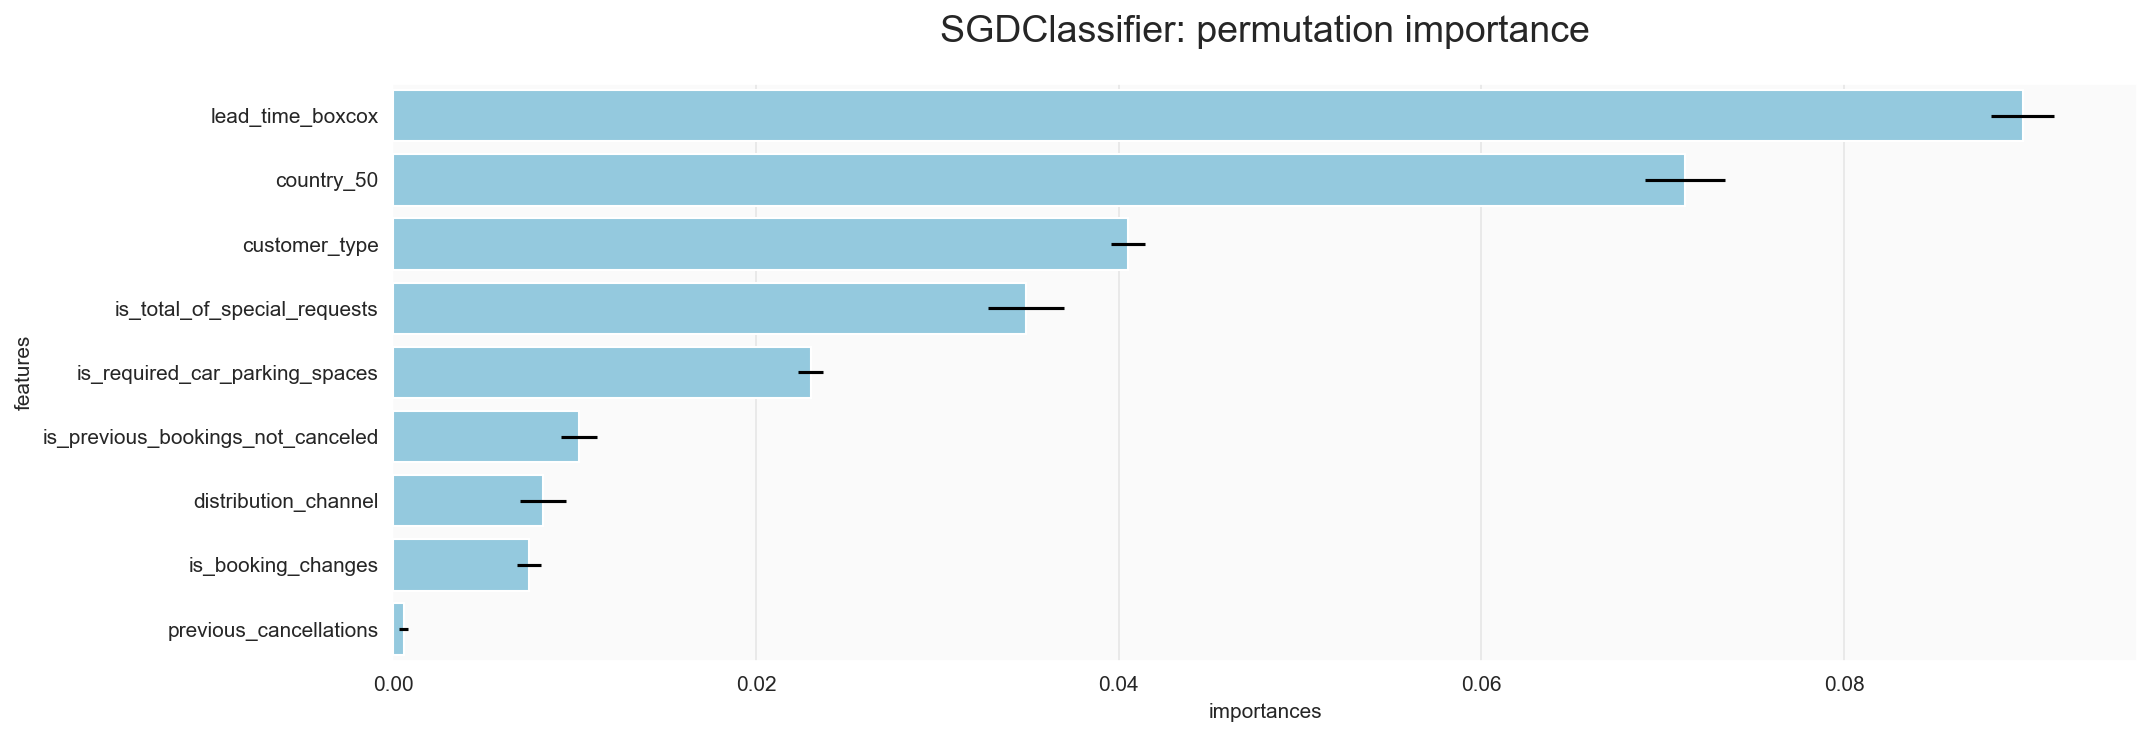

In [347]:
plot_feature_importances(
                         'SGDClassifier',
                         # извлечение списка признаков
                         model.feature_names_in_,
                         # вычисление важности признаков
                         permutation_importance(model, X_test, Y_test,
                                                scoring=SCORING, n_repeats=10, n_jobs=-1, random_state=RS)
                        )

> На первый взгляд, признак `previous_cancellations` значим, но без него качество модели практически не меняется. Кроме того, на тестовом наборе значимость этого признака околонулевая. Вероятно, это связано с тем, что у отеля слишком мала доля повторных клиентов. Можно оставить этот признак в расчете, что со временем доля повторных клиентов увеличится.

> Самым значимым признаком оказался `country_50` (производный от `country` с укрупнением категорий). Можно поэкспериментировать с порогом, ниже которого страны относятся к категории `OTHER`.

---

## Прибыль от внедрения модели

Модель приносит прибыль, когда с клиента, в итоге отменившего заказ, взымается депозит.

In [348]:
DEPOSIT_COEFF = 0.8     # коэффициент для расчета депозита
DEVELOP_COST = 400e3    # стоимость разработки системы прогнозирования

In [349]:
data_test['predicted'] = model.predict(X_test)

In [350]:
data_test['deposit_profit'] = np.select([data_test.is_canceled != data_test.predicted,
                                         data_test.is_canceled + data_test.predicted == 2],
                                        [0, (data_test.season_room_price + data_test.room_service_price) * DEPOSIT_COEFF]
                                       )

In [351]:
data_test[['is_canceled','predicted','season_room_price','room_service_price','deposit_profit']].sample(5)

,is_canceled,predicted,season_room_price,room_service_price,deposit_profit
6767,0,0,1400,400,0.000
28757,0,0,770,150,0.000
13819,1,0,1200,400,0.000
7485,0,0,1400,400,0.000
23459,0,0,1200,400,0.000


In [352]:
print(f'{CR}Прибыль, ожидаемая от внедрения модели:')
print(f' - за 8 месяцев тестовых данных:  {(data_test.deposit_profit.sum() - DEVELOP_COST) / 1e6 :.3f} млн.руб')
print(f' - за 2017 год (расчетно):        {(data_test.deposit_profit.sum() * 1.5 - DEVELOP_COST) / 1e6 :.3f} млн.руб')


Прибыль, ожидаемая от внедрения модели:
 - за 8 месяцев тестовых данных:  10.331 млн.руб
 - за 2017 год (расчетно):        15.697 млн.руб


> Предполагаемая от внедрения модели прибыль за тестовый период во много раз превысила бы затраты на разработку.

> В прогнозе на полный 2017 год использовано простое помесячное усреднение. Для более точного прогноза можно рассчитать прибыль в зависимости от месяца, опираясь на предыдущий полный год.

---

## Признаки клиента, повышающие вероятность отмены заказа

**country**  
Клиенты из Португалии делают отказы значительно чаще. К тому же, клиентов из этой страны больше всего.

**distribution_channel = 'TA/TO'**  
Клиент сделал заказ через туроператора/турагентство. Возможно, так туроператоры cтрахуются, делая заказ в нескольких отелях. Либо им попались неопределившиеся клиенты (см. `previous_cancellations`).

**previous_cancellations > 0**  
Если клиент отменял заказы раньше, это повышает вероятность отказа в будущем. Возможно, у человека часто меняются обстоятельства или он страхуется, как туроператор. Либо просто характер такой.

**lead_time**  
Чем заблаговременнее клиент делает заказ, тем выше вероятность отказа. За время ожидания обстоятельства могут измениться.

**days_in_waiting_list > 0**  
Если клиенту приходится ждать подтверждение заказа от отеля, вероятность отказа растет. Никто не любит, а иногда и не может ждать.

> Здесь учтены только признаки, повышающие вероятность отказа.  
> Признаки снижающие вероятность отказа не учитываются.  
> Например, требование парковки снижает вероятность отказа, но это не означает, что отсутствие такого требования — признак склонности к отказу.

---

## Вывод

### Краткий обзор проведенной работы

1. Выполнена проверка входных данных и незначительная их правка.
1. Выполнен исследовательский анализ данных.
1. Оценена прибыль отеля до внедрения депозитов.
1. Выбрана метрика для обучения моделей.
1. Обучены несколько моделей, оценено их качество на кросс-валидации.
1. Выбрана лучшая модель, которая затем проверена на тестовой выборке.
1. Оценена прибыль, которую принесет выбранная модель.
1. На основе исследовательского анализа выявлены признаки клиента, склонного к отмене заказа.

### Основная часть

#### Исследовательский анализ

Выявлен умеренный дисбаланс классов.  
Изучено распределение признаков в зависимости от значения целевой переменной.  
Исследована целесообразность преобразования ряда признаков в бинарные.  
Отдельно изучен признак `country` с целью укрупнения категорий.  
Изучена корреляция признаков друг с другом и целевой переменной.  
Описаны признаки клиента, повышающие вероятность отмены заказа.

#### Прибыль

Рассчитана прибыль до внедрения депозитов.

#### Подготовка данных для моделей

Созданы дополнительные признаки.  
Ряд признаков исключен.  
Выделена целевая переменная и признаки.  
Для раздельной обработки числовых и категориальных признаков создан пайплайн:  
    - числовые признаки будут обработаны алгоритмом StandardScaler();  
    - нечисловые признаки будут обработаны алгоритмом OneHotEncoder().

#### Обучение моделей и выбор лучшей.

В качестве основной метрики выбрана `F1`. По ней подбирались гиперпараметры модели и выбор лучшей среди них. Дополнительные метрики `accuracy`, `recall`, `ROC-AUC`, `коэффициент корреляции Мэтьюса` и `каппа Коэна` помогли убедиться в правильности выбора модели и отсутствии переобучения.  
Выполнен подбор оптимальных гиперпараметров.  
Выполнено сравнение результатов моделей на кроссвалидации и выбрана лучшая модель.  

#### Финальная модель

На тестовой выборке наблюдается некоторое снижение метрик. Впрочем, не слишком большое, чтобы уверенно говорить о переобучении.  
На финальной модели изучена степень влияния признаков, как на обучающем наборе, так и на тестовом. По некоторым признакам сделаны дополнительные выводы.

#### Прибыль

Рассчитана предполагаемая прибыль от внедрения депозитов.

### Рекомендации и риски
 
Корреляция признаков с целевой переменной низкая. Возможно, данных признаков недостаточно для повышения качества моделей. Либо с имеющимися признаками необходимо провести дополнительную работу.

Неизвестно, в какой момент клиенту будет предложено внести депозит. Если до того, как клиент сможет внести какие-либо изменения в заказ, то признак `is_booking_changes` не успеет сформироваться. В этом случае необходимо исключить его из модели.

Если предложить клиенту депозит, это не означает, что он его оплатит. Поэтому результат от внедрения модели может отличаться как в меньшую, так и в большую сторону в зависимости от спроса на отель. Это можно попробовать учесть в рассчетах. Например, добавив информацию о текущей степени заполненности отеля.